In [6]:
# step1
import pandas as pd
df = pd.read_csv('pre_24h_data_v6.csv')
print("len df", len(df)) #2840*24
print(df.isna().sum())
# drop the row having nan
df = df.dropna(axis=0, how='any')
print("len df", len(df)) #2774*24  66
print(df.isna().sum())
# replace inf with zero
df.replace([np.inf, -np.inf], 0, inplace=True)

# Assuming your DataFrame is named df
df['charttime'] = pd.to_datetime(df['charttime'])  # Convert to datetime if not already
df.sort_values(['stay_id', 'charttime'], inplace=True)  # Sort by stay_id and charttime

# Calculate the 'before_weaning_hr' column
df['before_weaning_hr'] = df.groupby('stay_id').cumcount(ascending=False)

# Resetting index (optional)
df.reset_index(drop=True, inplace=True)

# compute BMI
df['BMI'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)

# drop need drop column
df = df.drop(['Unnamed: 0', 'Rev_h', 'dod_h'], axis=1) # 'subject_id', 'hadm_id', 'stay_id', 

print(df.columns)

# transform the (type is object) column to one hot encoding
cols_need_one_hot_encoding = ['gender', 'race','admission_type', 'first_careunit', 'insurance'] #, 'ventilator_mode_group']
one_hot_encoding = pd.get_dummies(df[cols_need_one_hot_encoding])
df_with_one_hot_encoding = df.join(one_hot_encoding) # df.join default index-on-index
df_with_one_hot_encoding


len df 68160
Unnamed: 0                  0
charttime                   0
stay_id                     0
heart_rate                  0
sbp                         0
dbp                         0
mbp                         0
resp_rate                   0
spo2                        0
peep                        0
fio2                        0
tidal_volume_observed       0
respiratory_rate_set      360
plateau_pressure         1536
GCS                         0
age_now                     0
gender                      0
insurance                   0
race                        0
admission_type              0
first_careunit              0
weight_kg                   0
height_cm                   0
tobacco                     0
label                       0
Rev_h                       0
dod_h                       0
RSBI                        0
minute_ventilation          0
dtype: int64
len df 66576
Unnamed: 0               0
charttime                0
stay_id                  0
heart_rate

charttime   stay_id  heart_rate    sbp   dbp   mbp  resp_rate  \
0     2144-01-11 20:00:00  30005707        67.0  115.0  54.0  74.0       11.0   
1     2144-01-11 21:00:00  30005707        73.0  112.0  41.0  67.0       17.0   
2     2144-01-11 22:00:00  30005707        72.0  117.0  51.0  72.0       15.0   
3     2144-01-11 23:00:00  30005707        73.0  123.0  50.0  74.0       15.0   
4     2144-01-12 00:00:00  30005707        72.0  133.0  57.0  83.0       17.0   
...                   ...       ...         ...    ...   ...   ...        ...   
66571 2124-08-21 05:00:00  39995735        80.0  133.0  61.0  84.0       23.0   
66572 2124-08-21 06:00:00  39995735        80.0  130.0  57.0  80.0       27.0   
66573 2124-08-21 07:00:00  39995735        80.0  131.0  56.0  79.0       21.0   
66574 2124-08-21 08:00:00  39995735        82.0  141.0  58.0  82.0       25.0   
66575 2124-08-21 09:00:00  39995735        80.0  130.0  52.0  75.0       22.0   

       spo2  peep  fio2  ...  first_careunit_Coronary Care Unit (CCU)  \
0      94.0   5.0  40.0  ...                                    False   
1      95.0   5.0  40.0  ...                                    False   
2      96.0   5.0  40.0  ...                                    False   
3      95.0   5.0  40.0  ...                                    False   
4      97.0   5.0  40.0  ...                                    False   
...     ...   ...   ...  ...                                      ...   
66571  95.0   5.0  40.0  ...                                    False   
66572  94.0   5.0  50.0  ...                                    False   
66573  95.0   5.0  50.0  ...                                    False   
66574  97.0   5.0  40.0  ...                                    False   
66575  99.0   5.0  40.0  ...                                    False   

       first_careunit_Medical Intensive Care Unit (MICU)  \
0                                                  False   
1                                                  False   
2                                                  False   
3                                                  False   
4                                                  False   
...                                                  ...   
66571                                              False   
66572                                              False   
66573                                              False   
66574                                              False   
66575                                              False   

       first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU)  \
0                                                  False                 
1                                                  False                 
2                                                  False                 
3                                                  False                 
4                                                  False                 
...                                                  ...                 
66571                                              False                 
66572                                              False                 
66573                                              False                 
66574                                              False                 
66575                                              False                 

       first_careunit_Neuro Intermediate  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   
...                                  ...   
66571                              False   
66572                              False   
66573                              False   
66574                              False   
66575                              False   

       first_careunit_Neuro

In [6]:
# candelete
print(df.columns)
print("tr_v", len(df)) #2132
print(df.isna().sum())

Index(['charttime', 'stay_id', 'heart_rate', 'sbp', 'dbp', 'mbp', 'resp_rate',
       'spo2', 'peep', 'fio2', 'tidal_volume_observed', 'respiratory_rate_set',
       'plateau_pressure', 'GCS', 'age_now', 'gender', 'insurance', 'race',
       'admission_type', 'first_careunit', 'weight_kg', 'height_cm', 'tobacco',
       'label', 'RSBI', 'minute_ventilation', 'before_weaning_hr', 'BMI'],
      dtype='object')
tr_v 66576
charttime                0
stay_id                  0
heart_rate               0
sbp                      0
dbp                      0
mbp                      0
resp_rate                0
spo2                     0
peep                     0
fio2                     0
tidal_volume_observed    0
respiratory_rate_set     0
plateau_pressure         0
GCS                      0
age_now                  0
gender                   0
insurance                0
race                     0
admission_type           0
first_careunit           0
weight_kg                0
height_cm 

In [7]:
# step2
# import
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GroupShuffleSplit # used to separated data
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
# draw decision tree
from io import StringIO
import numpy as np
from sklearn import tree
import pydotplus
import matplotlib.image as mpl_image
import matplotlib.pyplot as plt
from IPython.display import Image
import graphviz
import csv

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
# step3
# split data
# drop type which is not float or not int

# drop do one hot encoding #, 'ventilator_mode_group'
df_with_one_hot_encoding_drop_not_num = df_with_one_hot_encoding.drop([ 'weight_kg', 'height_cm', 'charttime',  'gender', 'race','admission_type', 'first_careunit', 'insurance'], axis=1)

# the before_weaning_hr we want
print_before_weaning_hr = 0
df_with_one_hot_encoding_drop_not_num = df_with_one_hot_encoding_drop_not_num[df_with_one_hot_encoding_drop_not_num['before_weaning_hr']==print_before_weaning_hr]
df_with_one_hot_encoding_drop_not_num.drop(['before_weaning_hr'], axis=1, inplace=True)

y = df_with_one_hot_encoding_drop_not_num['label']
X = df_with_one_hot_encoding_drop_not_num.drop(['label'], axis=1)

"""
stayid = df_with_one_hot_encoding_drop_not_num['stay_id']
stayid = stayid.drop_duplicates()
np.random.seed(42) # add seed
permu_stayid = np.random.permutation(stayid)

# split 0.6, 0.2, 0.2
num_patient =  len(permu_stayid)
train_stayid, validation_stayid, test_stayid = np.split(permu_stayid, [int(num_patient*0.6), int(num_patient*0.8)])
train_stayid, validation_stayid, test_stayid = pd.Series(train_stayid, name='stay_id'), pd.Series(validation_stayid, name='stay_id'), pd.Series(test_stayid, name='stay_id')
"""

# train, validation, test : 1859, 273, 528
train_stayid = pd.read_csv('train_data_id.csv')
validation_stayid = pd.read_csv('val_data_id.csv')
test_stayid = pd.read_csv('test_data_id.csv')

train_stayid.columns = ['stay_id']
validation_stayid.columns = ['stay_id']
test_stayid.columns = ['stay_id']

print("train", len(train_stayid)) # 1859
print("val", len(validation_stayid)) # 273
print("test", len(test_stayid)) # 528

train = pd.merge(train_stayid, df_with_one_hot_encoding_drop_not_num, on=['stay_id'], how='inner')
validation = pd.merge(validation_stayid, df_with_one_hot_encoding_drop_not_num, on=['stay_id'], how='inner')
test = pd.merge(test_stayid, df_with_one_hot_encoding_drop_not_num, on=['stay_id'], how='inner')
train_X = train.drop(['label', 'stay_id'], axis=1)
validation_X = validation.drop(['label', 'stay_id'], axis=1)
test_X = test.drop(['label', 'stay_id'], axis=1)
train_y = train['label']
validation_y = validation['label']
test_y = test['label']



#"""test
merge_tr_v = pd.merge(train_stayid, validation_stayid, on=['stay_id'], how='inner')
merge_v_te = pd.merge(validation_stayid, test_stayid, on=['stay_id'], how='inner')
merge_te_tr = pd.merge(test_stayid, train_stayid, on=['stay_id'], how='inner')
print("merge", merge_tr_v, merge_v_te, merge_te_tr)
union_stayid_tr_v = pd.concat([train_stayid, validation_stayid])
tr_v = pd.merge(union_stayid_tr_v, df_with_one_hot_encoding_drop_not_num, on=['stay_id'], how='inner')
tr_v_X = tr_v.drop(['label', 'stay_id'], axis=1)
tr_v_y = tr_v['label']
#testend"""
#print("X column", X.columns)
print(tr_v_X.columns)
print("tr_v", len(tr_v)) #2132

"""
# add
# Z-score
from sklearn import preprocessing
train_X = preprocessing.scale(train_X)
validation_X = preprocessing.scale(validation_X)
test_X = preprocessing.scale(test_X)
# addend
"""

train 1859
val 273
test 528
merge Empty DataFrame
Columns: [stay_id]
Index: [] Empty DataFrame
Columns: [stay_id]
Index: [] Empty DataFrame
Columns: [stay_id]
Index: []
Index(['heart_rate', 'sbp', 'dbp', 'mbp', 'resp_rate', 'spo2', 'peep', 'fio2',
       'tidal_volume_observed', 'respiratory_rate_set', 'plateau_pressure',
       'GCS', 'age_now', 'tobacco', 'RSBI', 'minute_ventilation', 'BMI',
       'gender_F', 'gender_M', 'race_AMERICAN INDIAN/ALASKA NATIVE',
       'race_ASIAN', 'race_ASIAN - ASIAN INDIAN', 'race_ASIAN - CHINESE',
       'race_ASIAN - KOREAN', 'race_ASIAN - SOUTH EAST ASIAN',
       'race_BLACK/AFRICAN', 'race_BLACK/AFRICAN AMERICAN',
       'race_BLACK/CAPE VERDEAN', 'race_BLACK/CARIBBEAN ISLAND',
       'race_HISPANIC OR LATINO', 'race_HISPANIC/LATINO - CENTRAL AMERICAN',
       'race_HISPANIC/LATINO - COLUMBIAN', 'race_HISPANIC/LATINO - DOMINICAN',
       'race_HISPANIC/LATINO - GUATEMALAN', 'race_HISPANIC/LATINO - HONDURAN',
       'race_HISPANIC/LATINO - MEXICA

'\n# add\n# Z-score\nfrom sklearn import preprocessing\ntrain_X = preprocessing.scale(train_X)\nvalidation_X = preprocessing.scale(validation_X)\ntest_X = preprocessing.scale(test_X)\n# addend\n'

In [ ]:
# total feature
all_feature = ['heart_rate', 'sbp', 'dbp', 'mbp', 'resp_rate', 'spo2','peep',
              'fio2', 'tidal_volume_observed', 'respiratory_rate_set', 'plateau_pressure','GCS','age_now','gender', 'insurance',
               'race', 'admission_type', 'first_careunit'
                ,'BMI', 'tobacco','RSBI', 'minute_ventilation']

In [9]:
# step4.0.0
# accuracy function
from sklearn import metrics
from sklearn.metrics import classification_report

def acc_function(Model, test_X, test_y):
    # 使用訓練資料預測
    predicted_test_y=Model.predict(test_X)
    # sensitivity
    recall = metrics.recall_score(test_y, predicted_test_y)
    print("sensitivity=recall=", recall)
    # specificity
    confusion_matrix = metrics.confusion_matrix(test_y, predicted_test_y)
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    specificity = (TN / float(TN+FP))
    print("specificity", specificity)
    # confusion_matrix
    print("confusion_matrix\n", confusion_matrix)
    # accuracy_score
    test_accuracy = accuracy_score(test_y, predicted_test_y)
    print("accuracy_score", test_accuracy)
    
    
    print('c_r')
    target_names = ['class 0', 'class 1']
    print(classification_report(test_y, predicted_test_y, target_names=target_names))

In [10]:
# step4.0.1
# feature importance
from sklearn.inspection import permutation_importance

def feature_importance(model, X, y):
    perm_importance = permutation_importance(model, X, y)
    perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()
    # feature's name
    feature_name = X.columns
    feature_name = np.array(feature_name)
    sorted_idx = perm_importance_normalized.argsort()
    # plot
    plt.figure(figsize=(8, 20))
    plt.title('feature importance', fontsize=20)
    plt.barh(feature_name[sorted_idx], perm_importance_normalized[sorted_idx], color='r', align='center')
    plt.xlabel('relative importance', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    for index, value in enumerate(perm_importance_normalized[sorted_idx]):
        plt.text(value, index,
                 str(round(value,2)), fontsize=15)
    
    plt.show()

In [11]:
# step4 decision tree

print("before weaning hour =", print_before_weaning_hr)

# GridSearchCV
from sklearn.model_selection import GridSearchCV

"""
Model = DecisionTreeClassifier() 
param_grid = {'criterion':('gini', 'entropy', 'log_loss'), 'max_depth':np.arange(1, 20), 'min_samples_split':np.arange(2, 6), 'min_samples_leaf':np.arange(1, 5), 'random_state':[42]}
grid_search = GridSearchCV(estimator=Model, param_grid=param_grid, scoring='roc_auc', error_score='raise')
grid_search.fit(tr_v_X, tr_v_y)
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
decisionTreeModel = grid_search.best_estimator_
"""


# 使用訓練資料訓練模型
decisionTreeModel = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4, min_samples_split=2, random_state=42)
decisionTreeModel = decisionTreeModel.fit(tr_v_X, tr_v_y)


"""
# accuracy for tr&v
print("train & v")
acc_function(decisionTreeModel, tr_v_X, tr_v_y)
"""
# accuracy for test
print("test")
acc_function(decisionTreeModel, test_X, test_y)

io = StringIO()
tree.export_graphviz(decisionTreeModel, feature_names=(X.drop(['stay_id'], axis=1)).columns, max_depth=3, out_file=io, class_names=np.array(train_y.unique()).astype('str').tolist(), filled=True)
graph_tree = pydotplus.graph_from_dot_data(io.getvalue())
graph_tree.write_png("decision tree")
img_tree = mpl_image.imread("decision tree")
#plt.figure(figsize=(200, 450))
#plt.show(img_tree)
Image(graph_tree.create_png())

"""
import csv
csvfile_dt = open('dt_for_roc.csv', 'w', newline='')
writer = csv.writer(csvfile_dt)
writer.writerow(decisionTreeModel.predict_proba(test_X)[:, 1])
csvfile_dt.close()
"""

before weaning hour = 0
test
sensitivity=recall= 0.9791044776119403
specificity 0.3160621761658031
confusion_matrix
 [[ 61 132]
 [  7 328]]
accuracy_score 0.7367424242424242
c_r
              precision    recall  f1-score   support

     class 0       0.90      0.32      0.47       193
     class 1       0.71      0.98      0.83       335

    accuracy                           0.74       528
   macro avg       0.81      0.65      0.65       528
weighted avg       0.78      0.74      0.69       528



"\nimport csv\ncsvfile_dt = open('dt_for_roc.csv', 'w', newline='')\nwriter = csv.writer(csvfile_dt)\nwriter.writerow(decisionTreeModel.predict_proba(test_X)[:, 1])\ncsvfile_dt.close()\n"

using (train and validation) to compute feature_importance


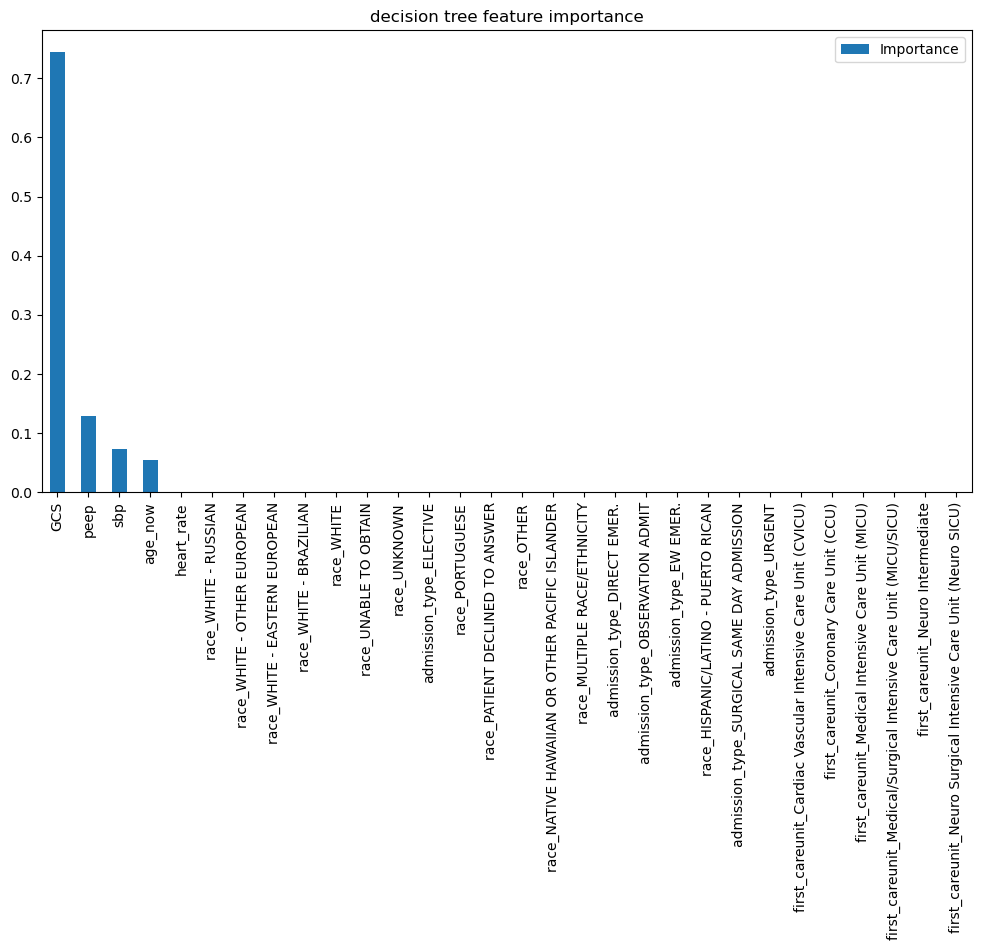

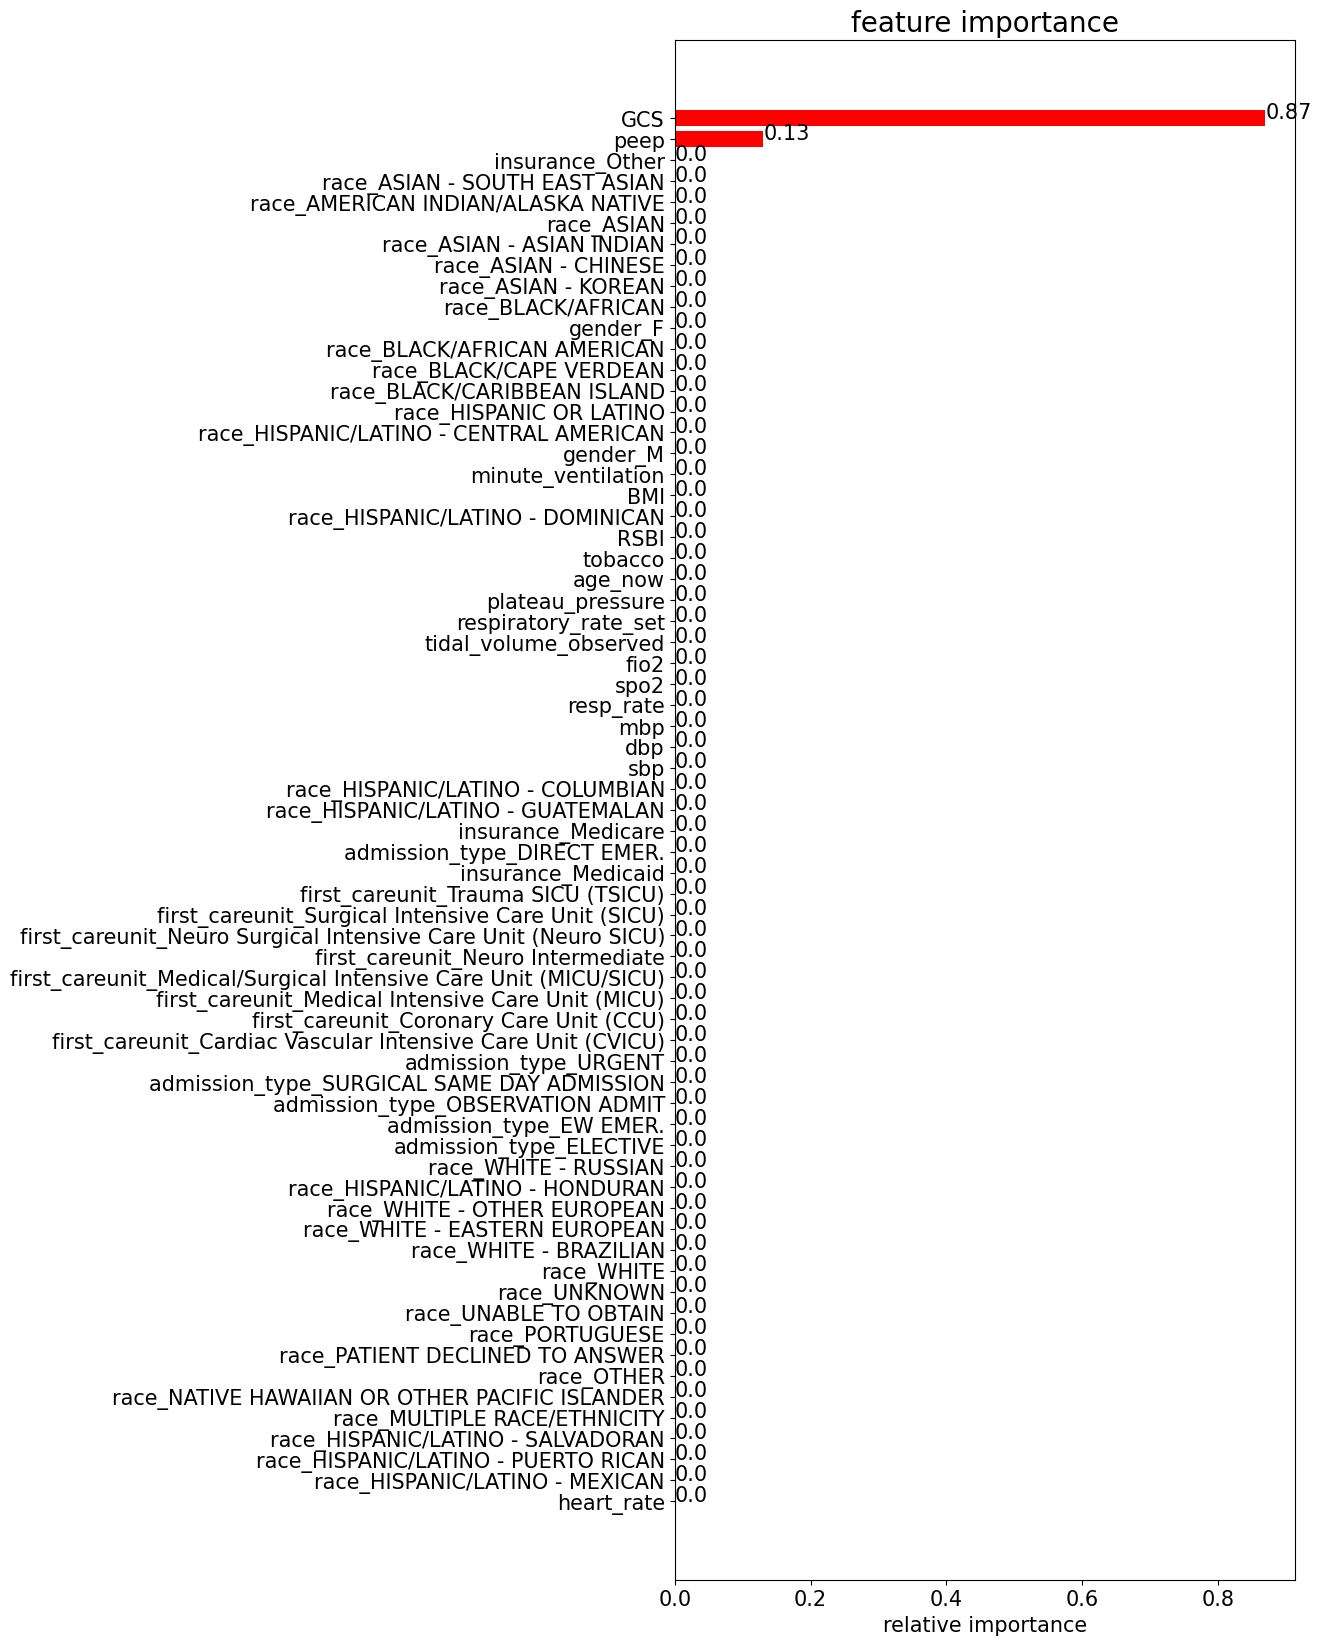

using test to compute feature_importance


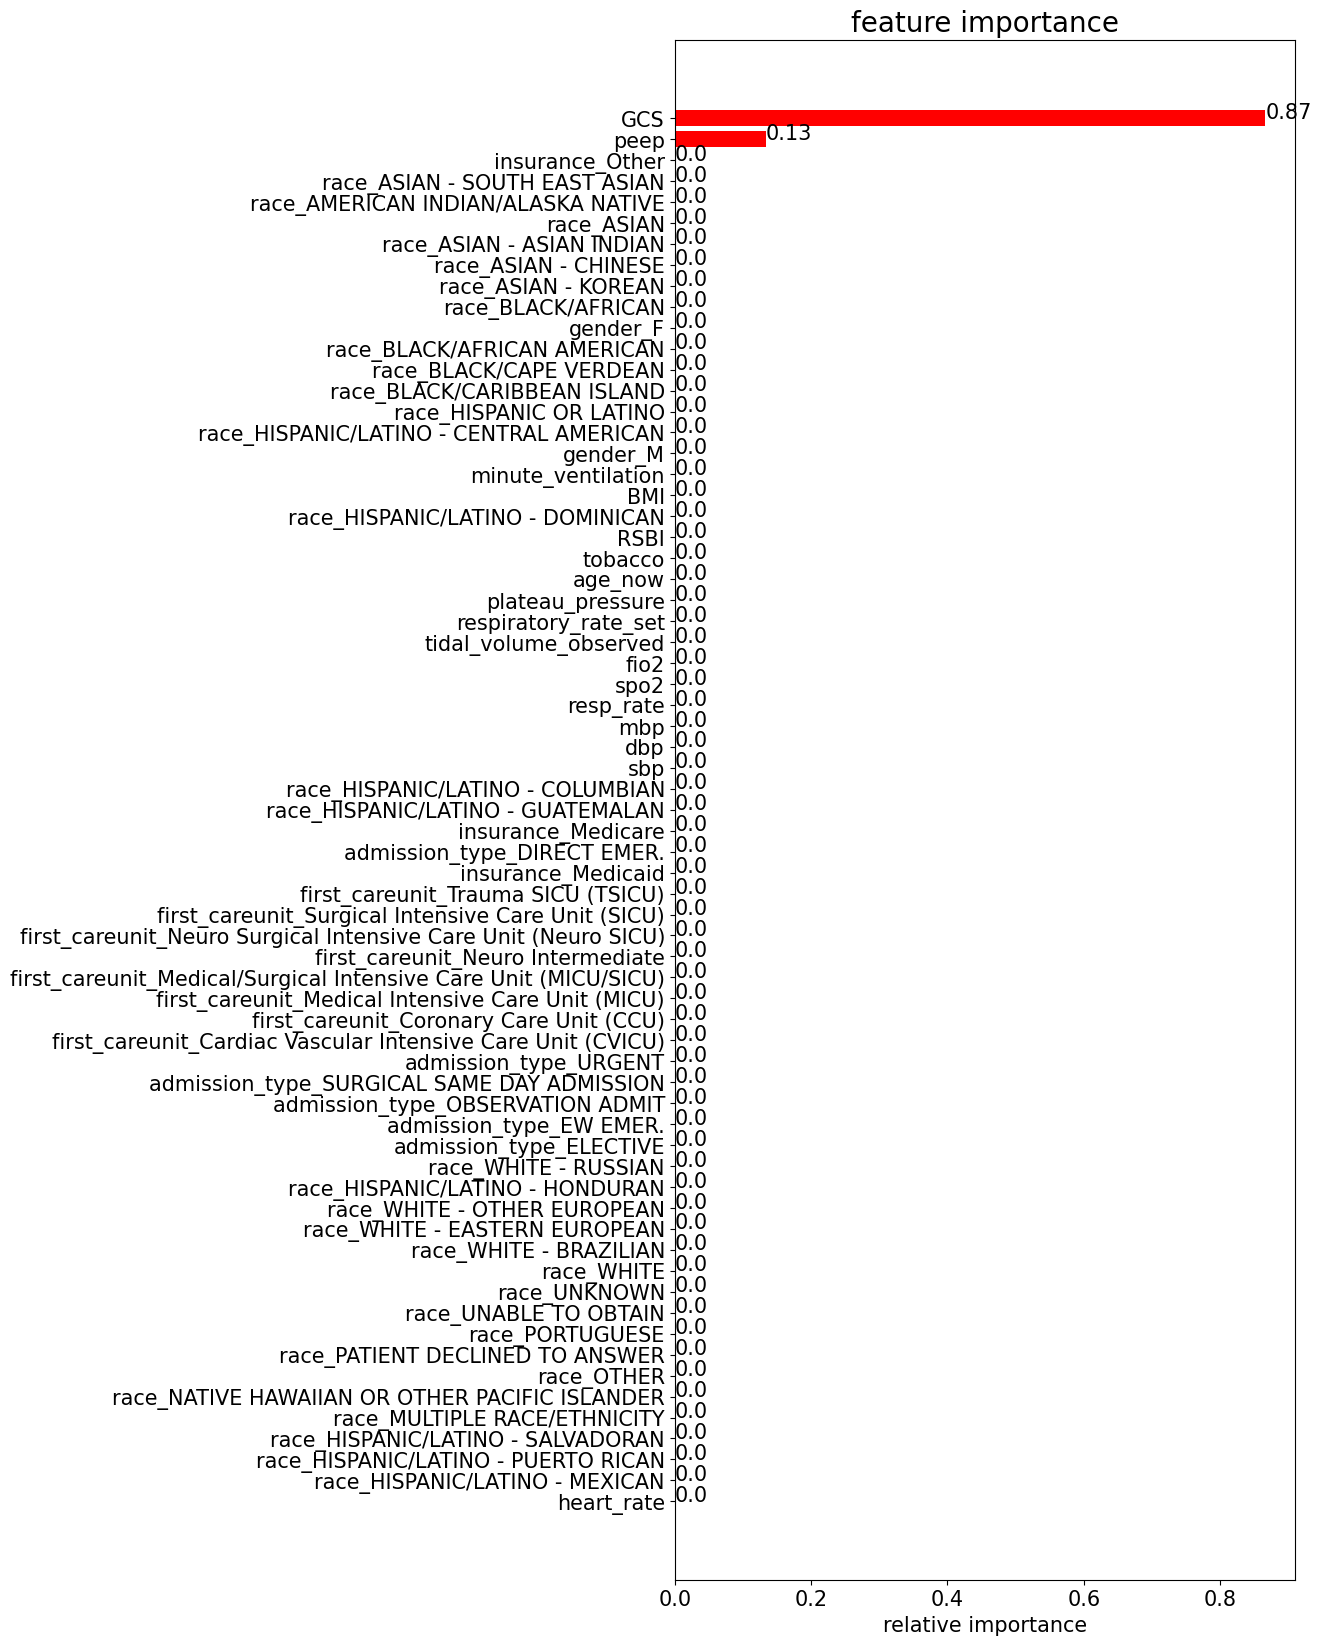

In [12]:
# step 4.1
# decision tree feature importance
dt_importance = decisionTreeModel.feature_importances_
# plot importance
df_dt_importance = pd.DataFrame(dt_importance, index=tr_v_X.columns, columns=['Importance'])
df_dt_importance.sort_values(by='Importance', ascending=False, inplace=True)
df_dt_importance = df_dt_importance[:30]
df_dt_importance.plot(kind='bar', figsize=(12, 6))
plt.title('decision tree feature importance')

print('using (train and validation) to compute feature_importance')
feature_importance(decisionTreeModel, tr_v_X, tr_v_y)
print('using test to compute feature_importance')
feature_importance(decisionTreeModel, test_X, test_y)

before weaning hour = 0
test
sensitivity=recall= 0.9791044776119403
specificity 0.27461139896373055
confusion_matrix
 [[ 53 140]
 [  7 328]]
accuracy_score 0.7215909090909091
c_r
              precision    recall  f1-score   support

     class 0       0.88      0.27      0.42       193
     class 1       0.70      0.98      0.82       335

    accuracy                           0.72       528
   macro avg       0.79      0.63      0.62       528
weighted avg       0.77      0.72      0.67       528



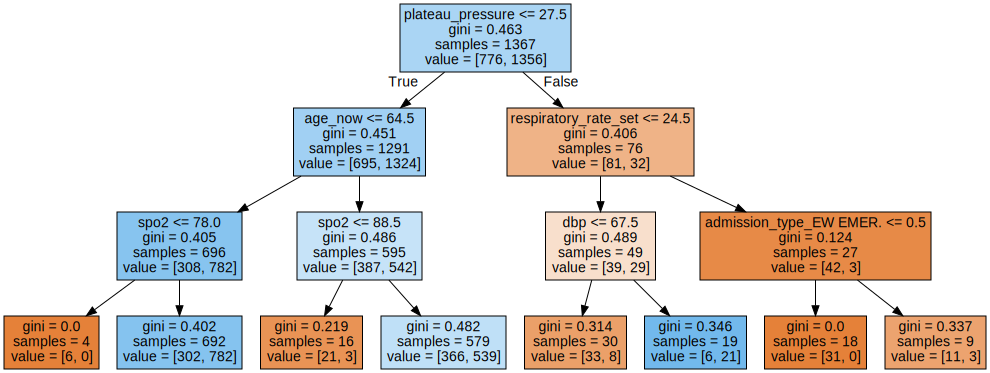

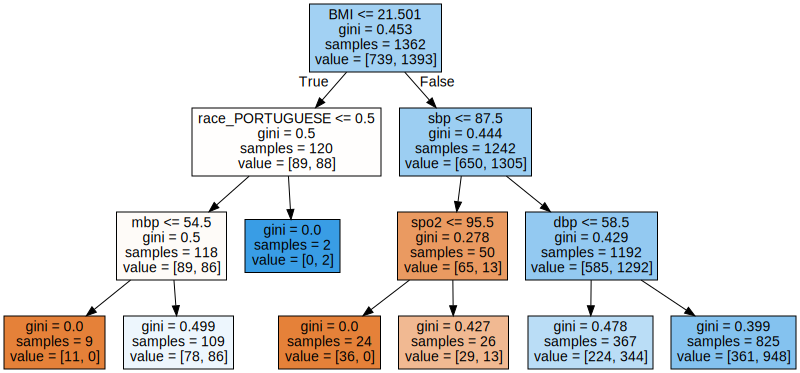

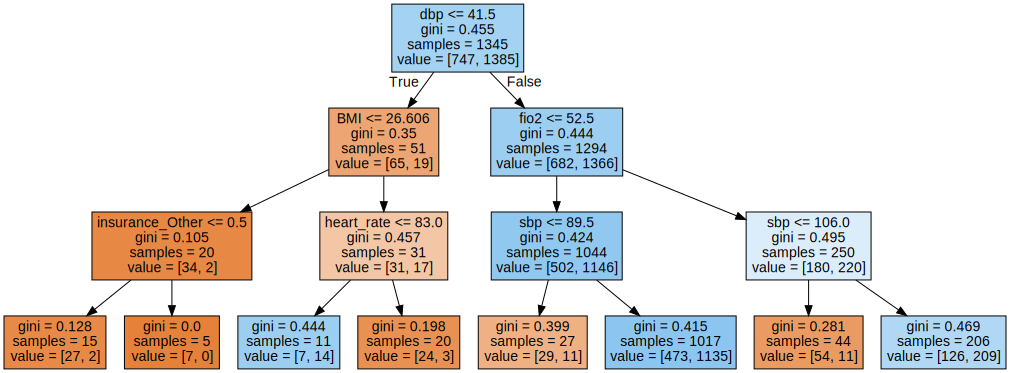

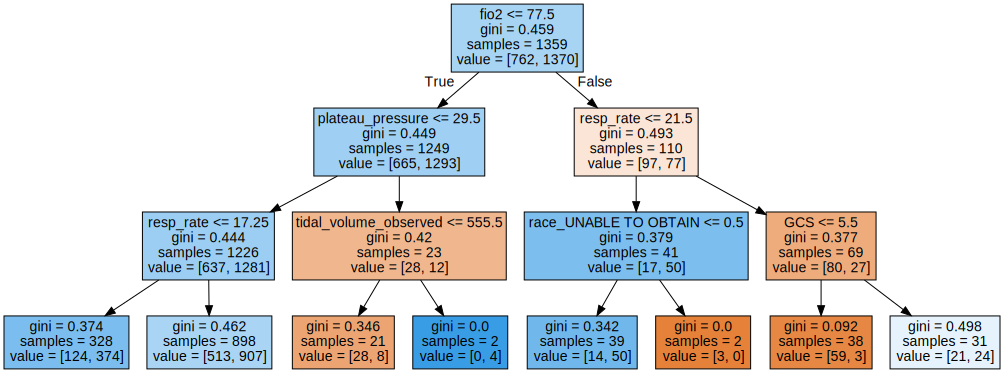

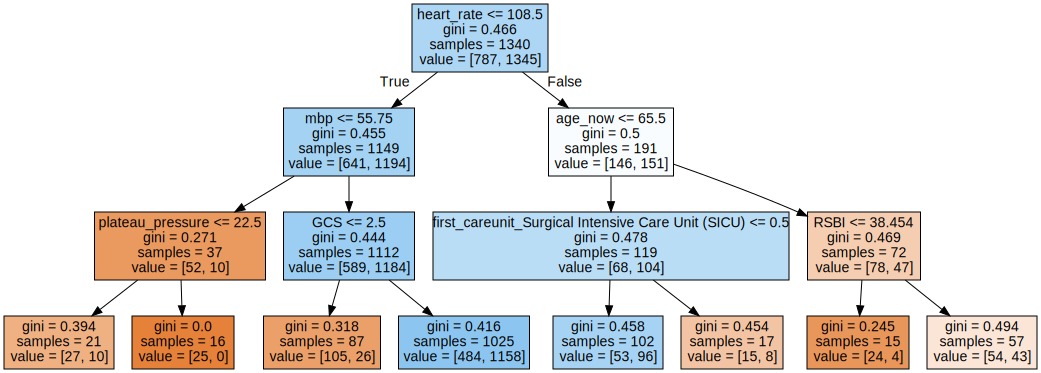

using (train and validation) to compute feature_importance


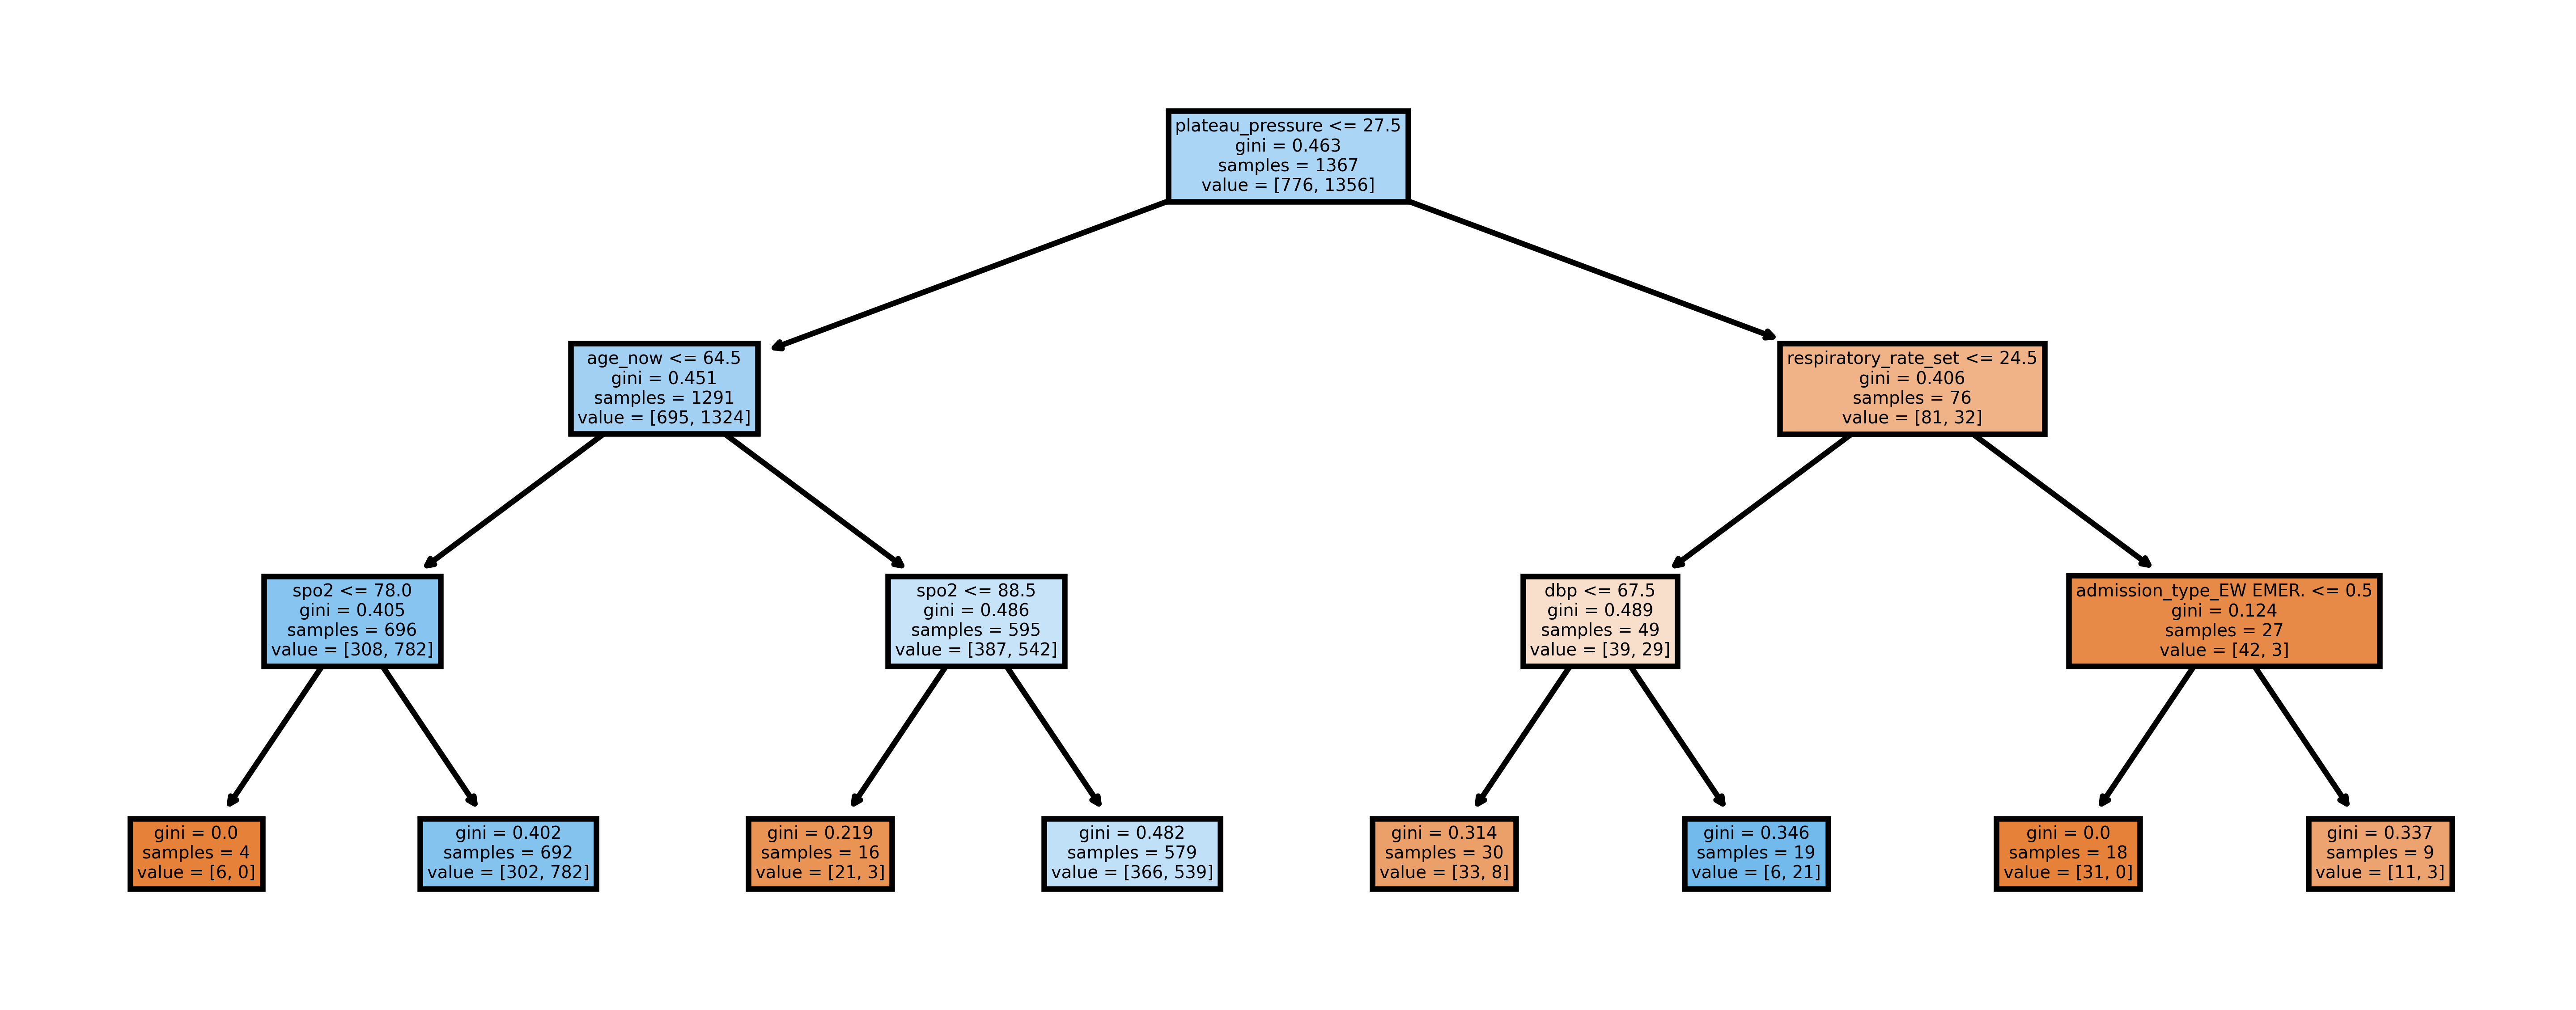

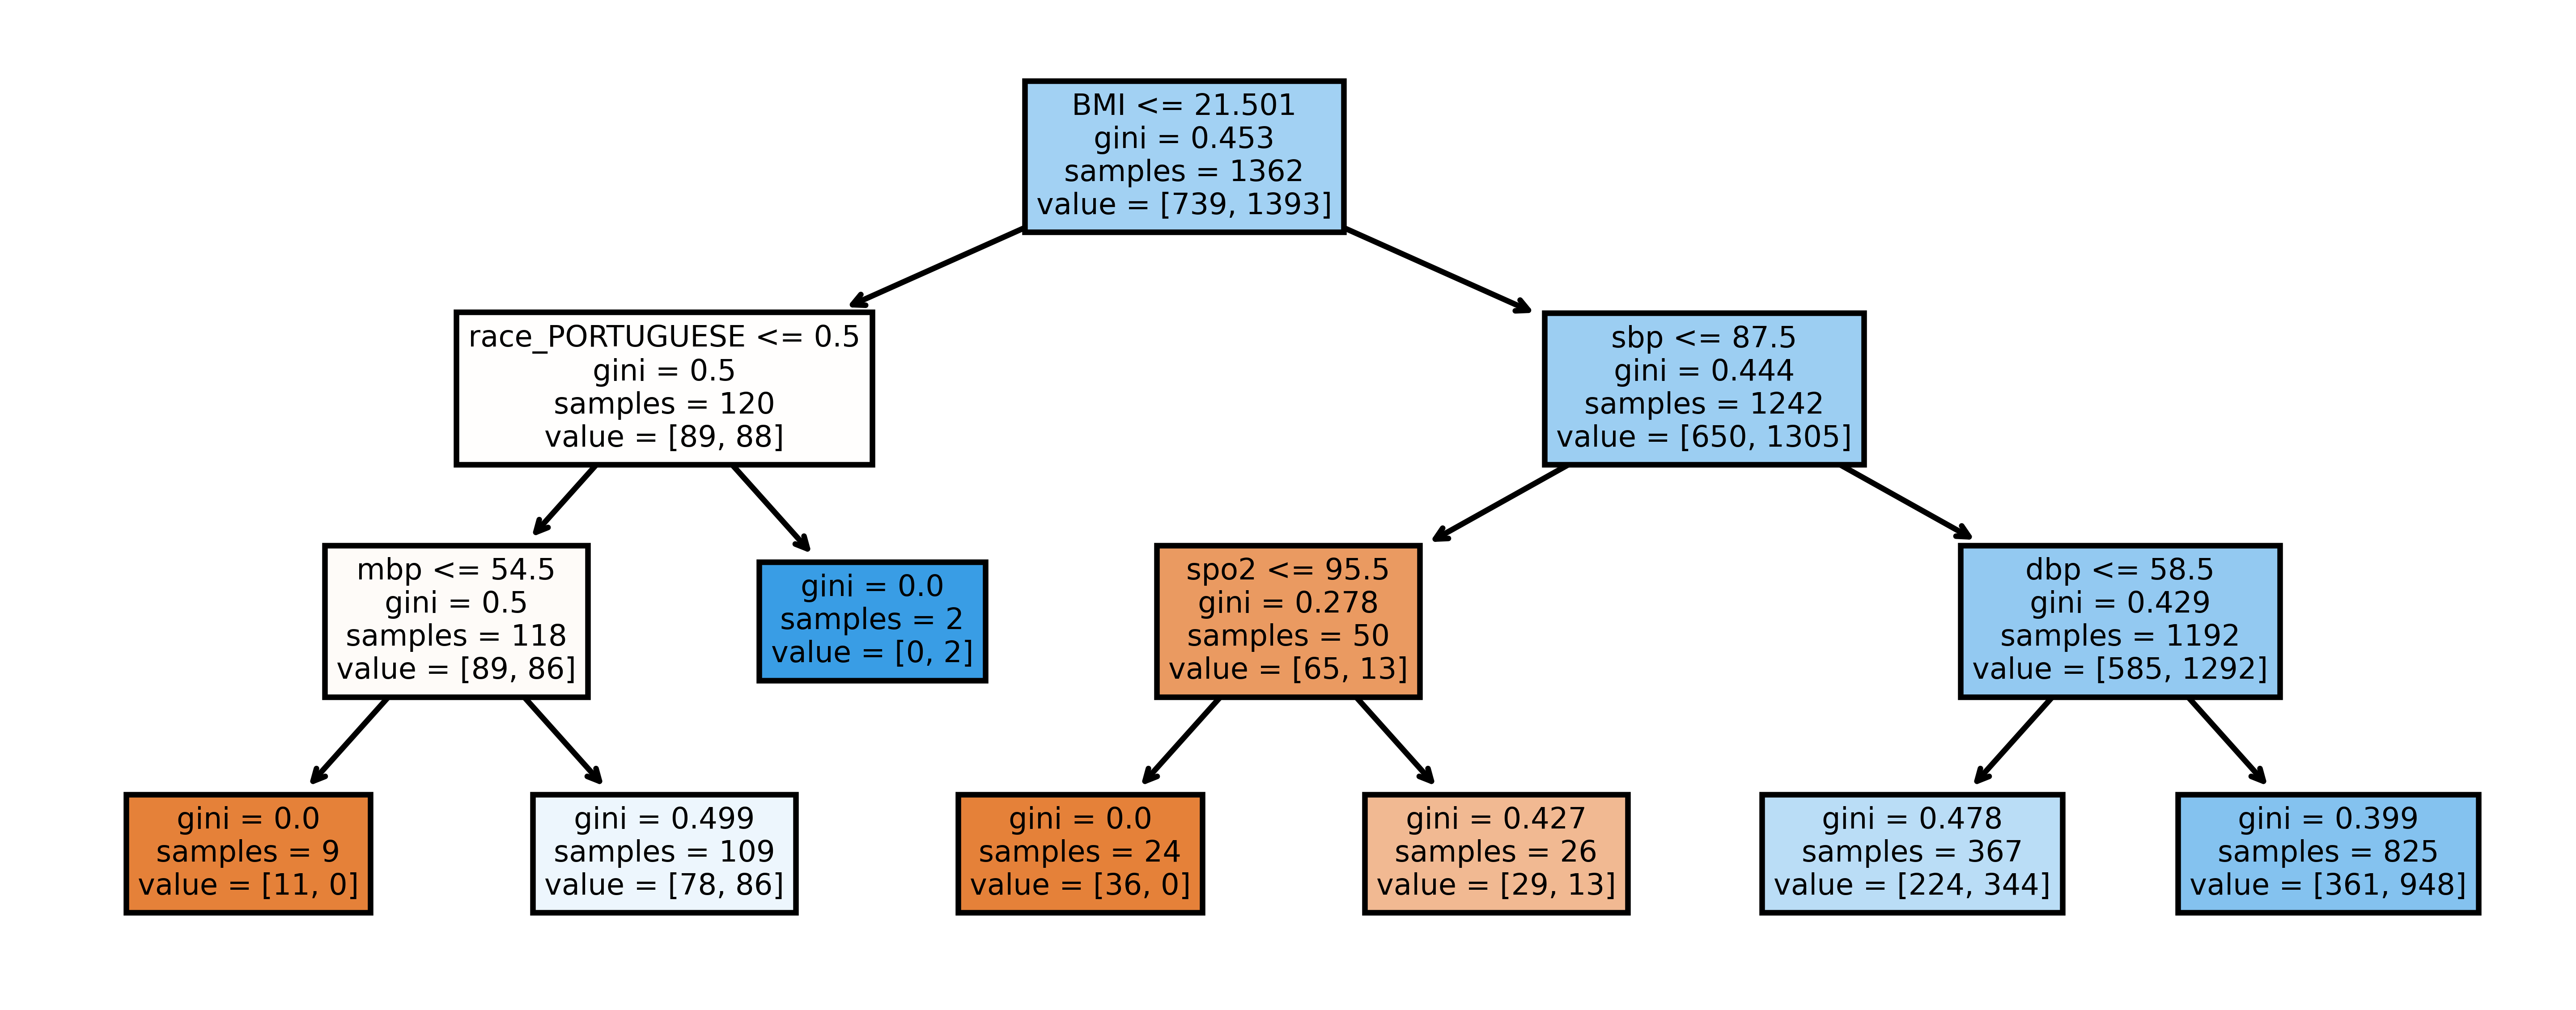

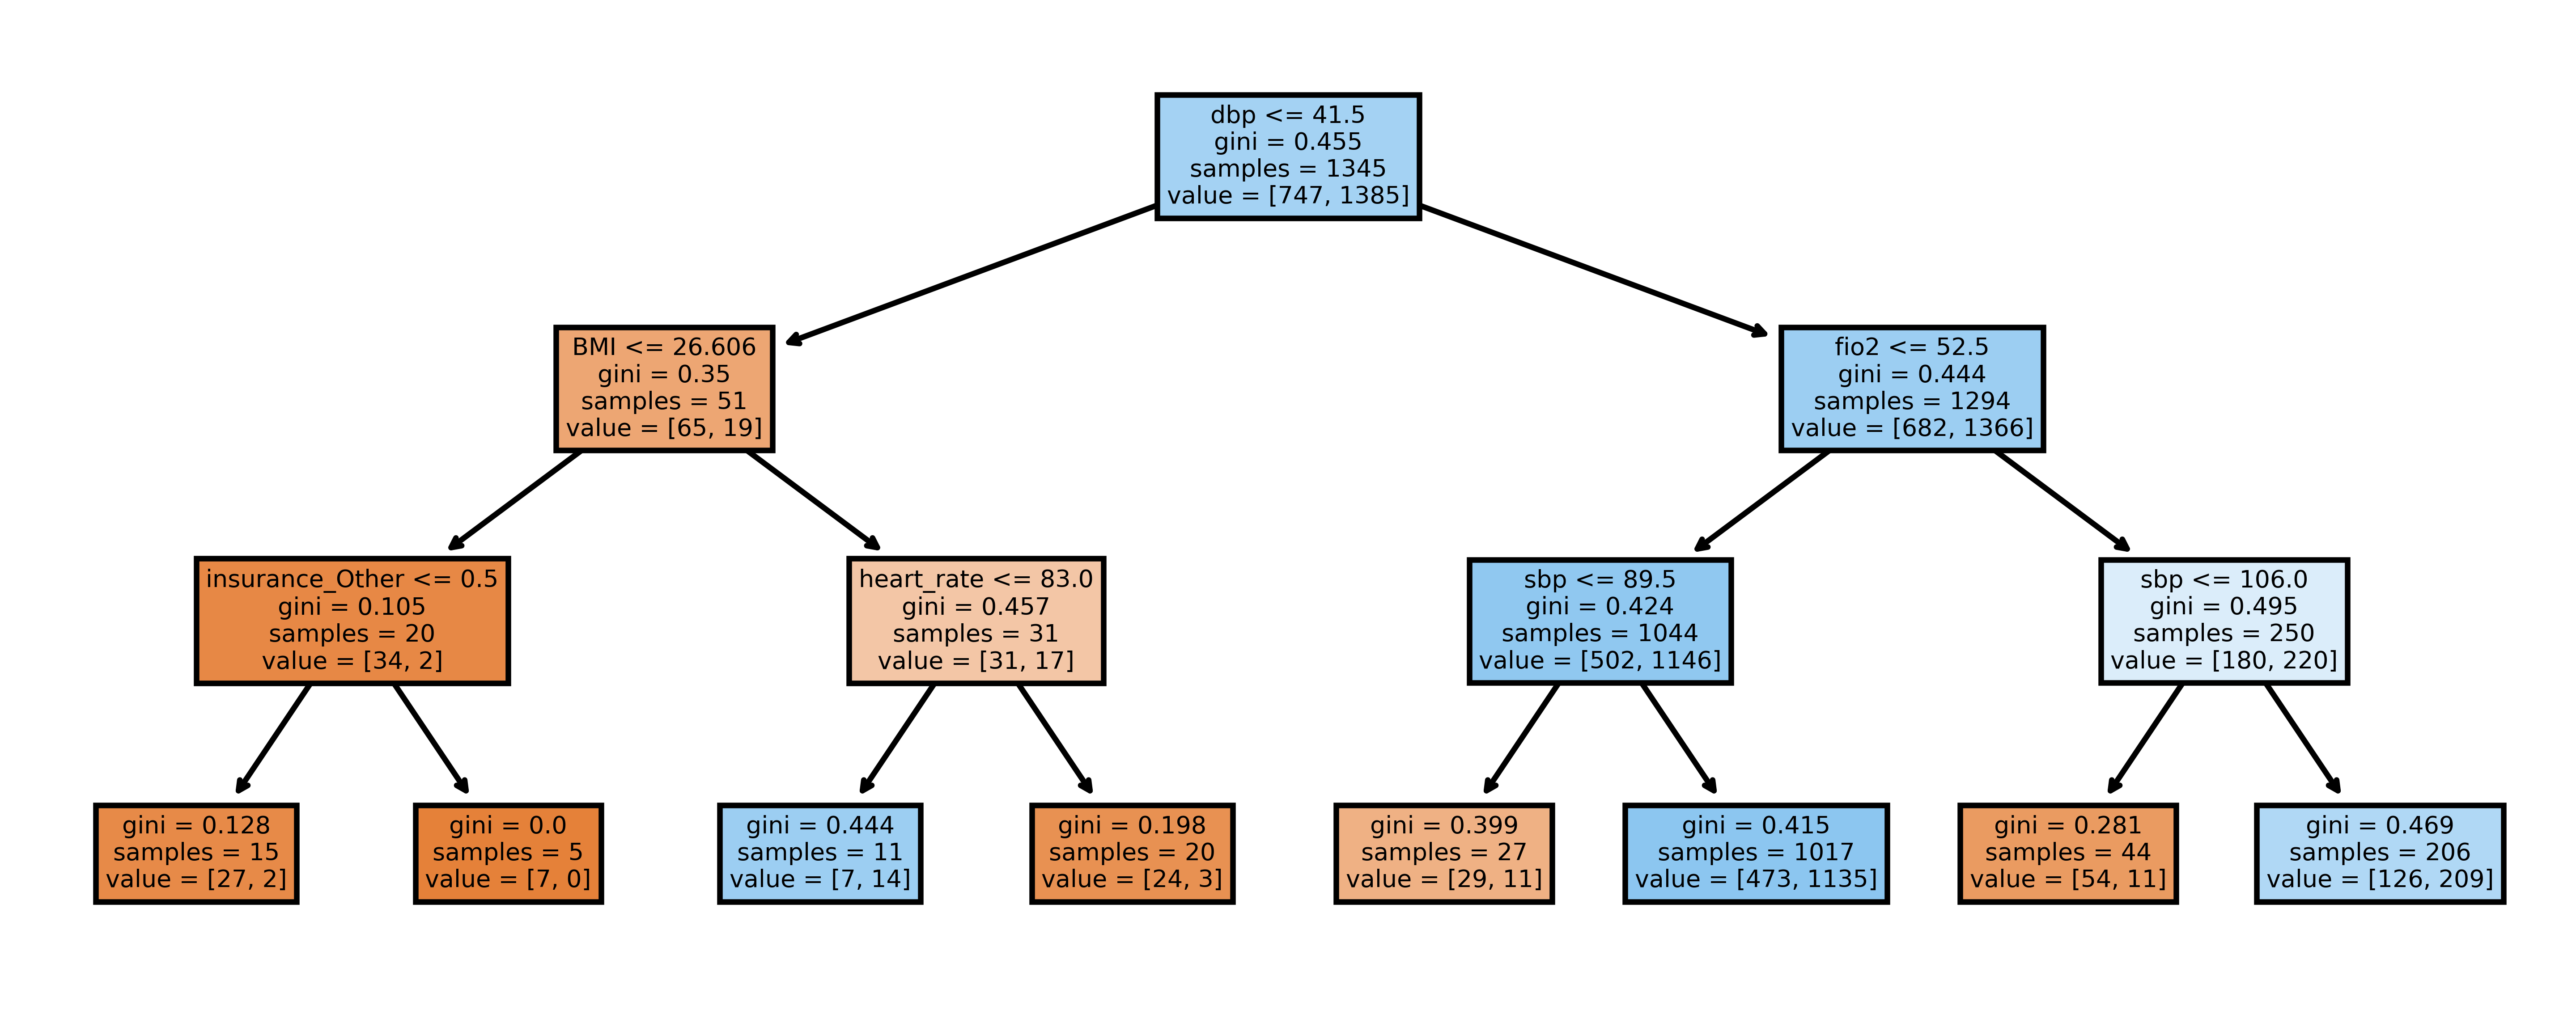

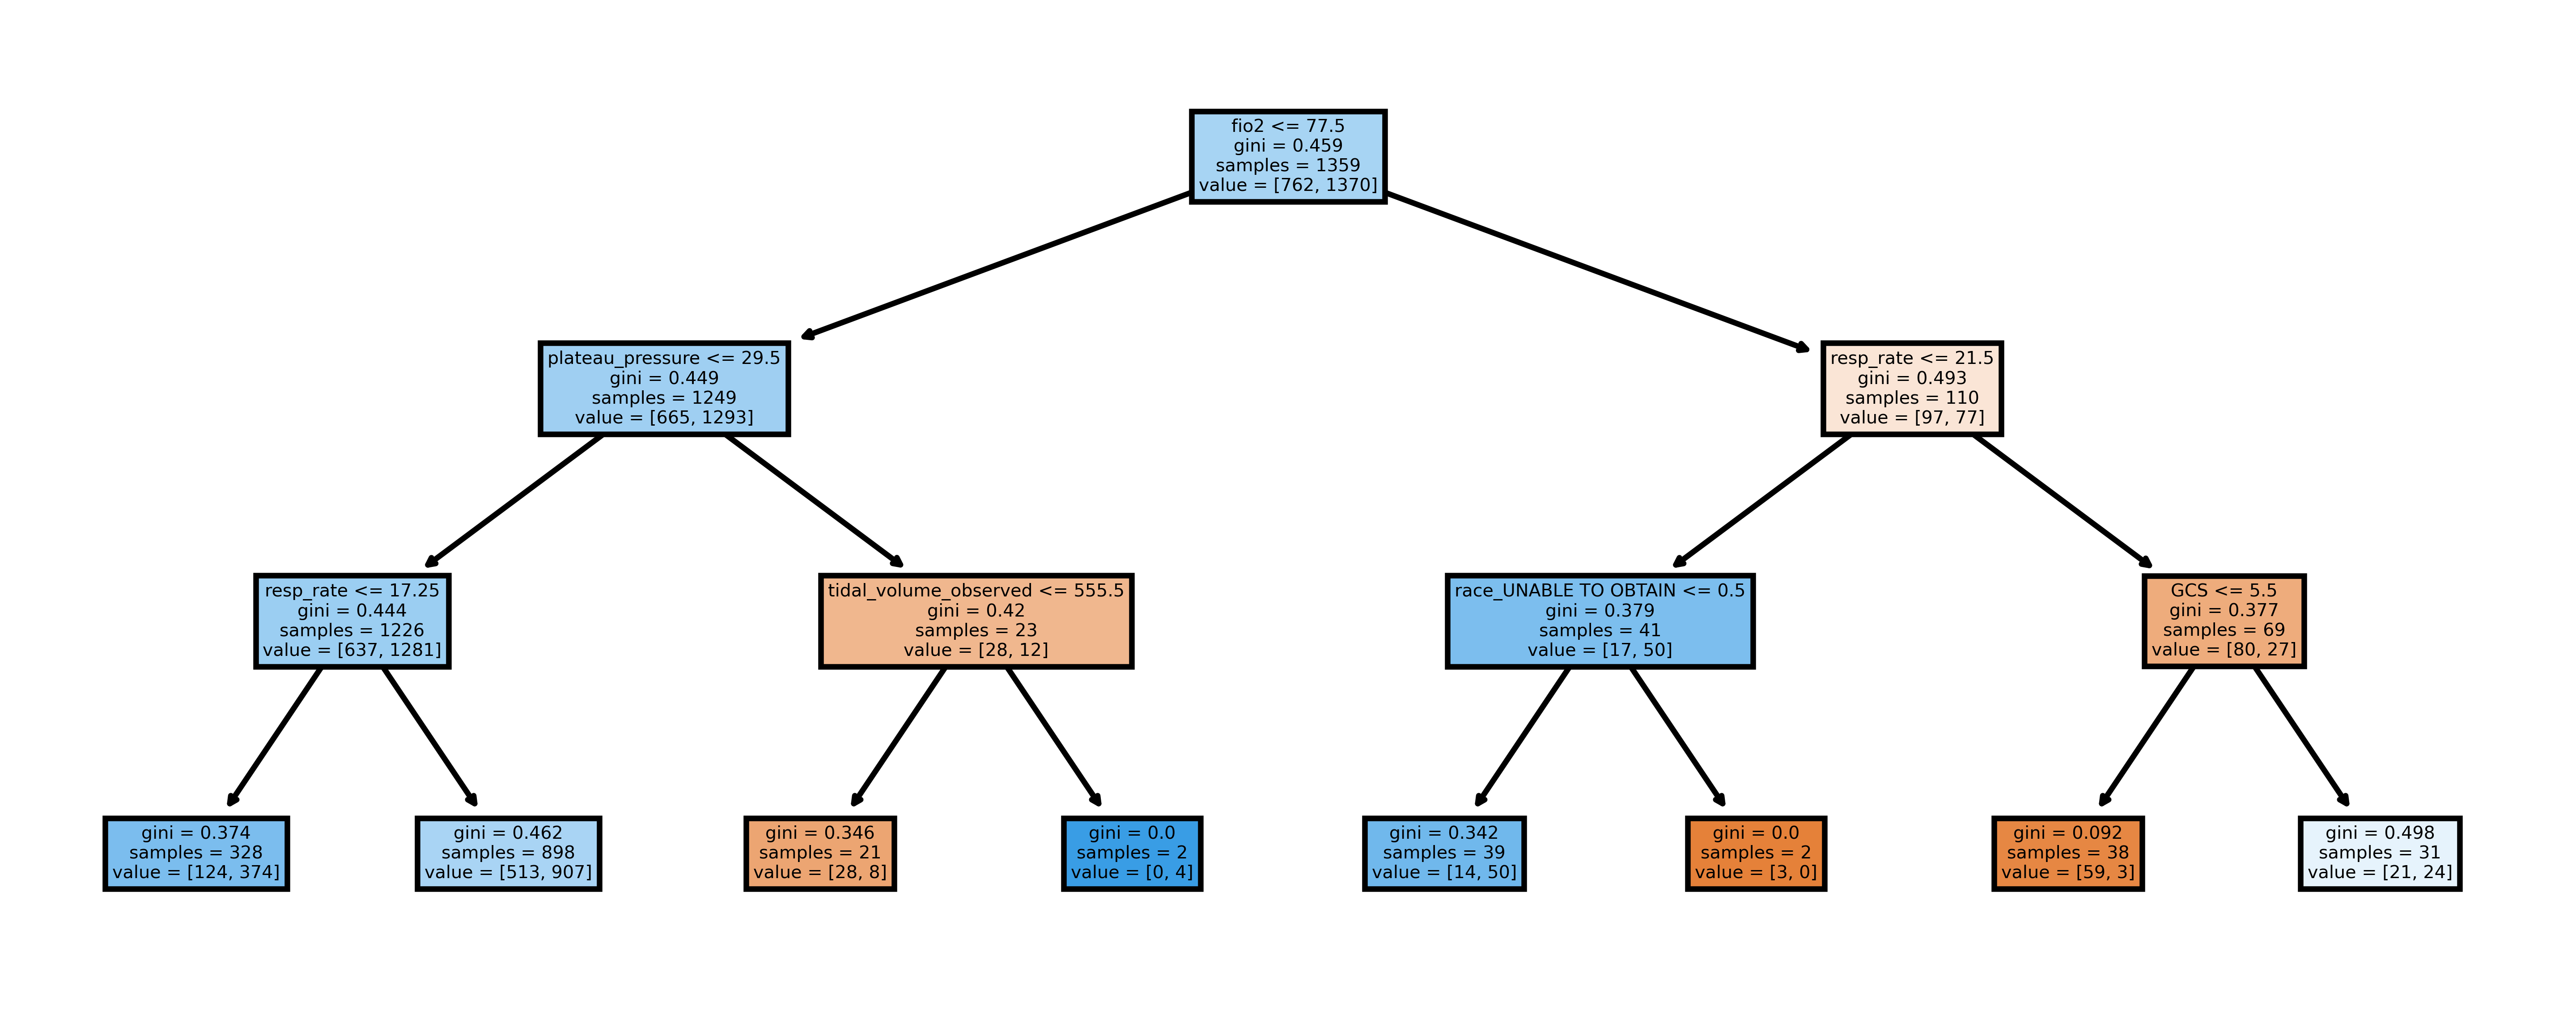

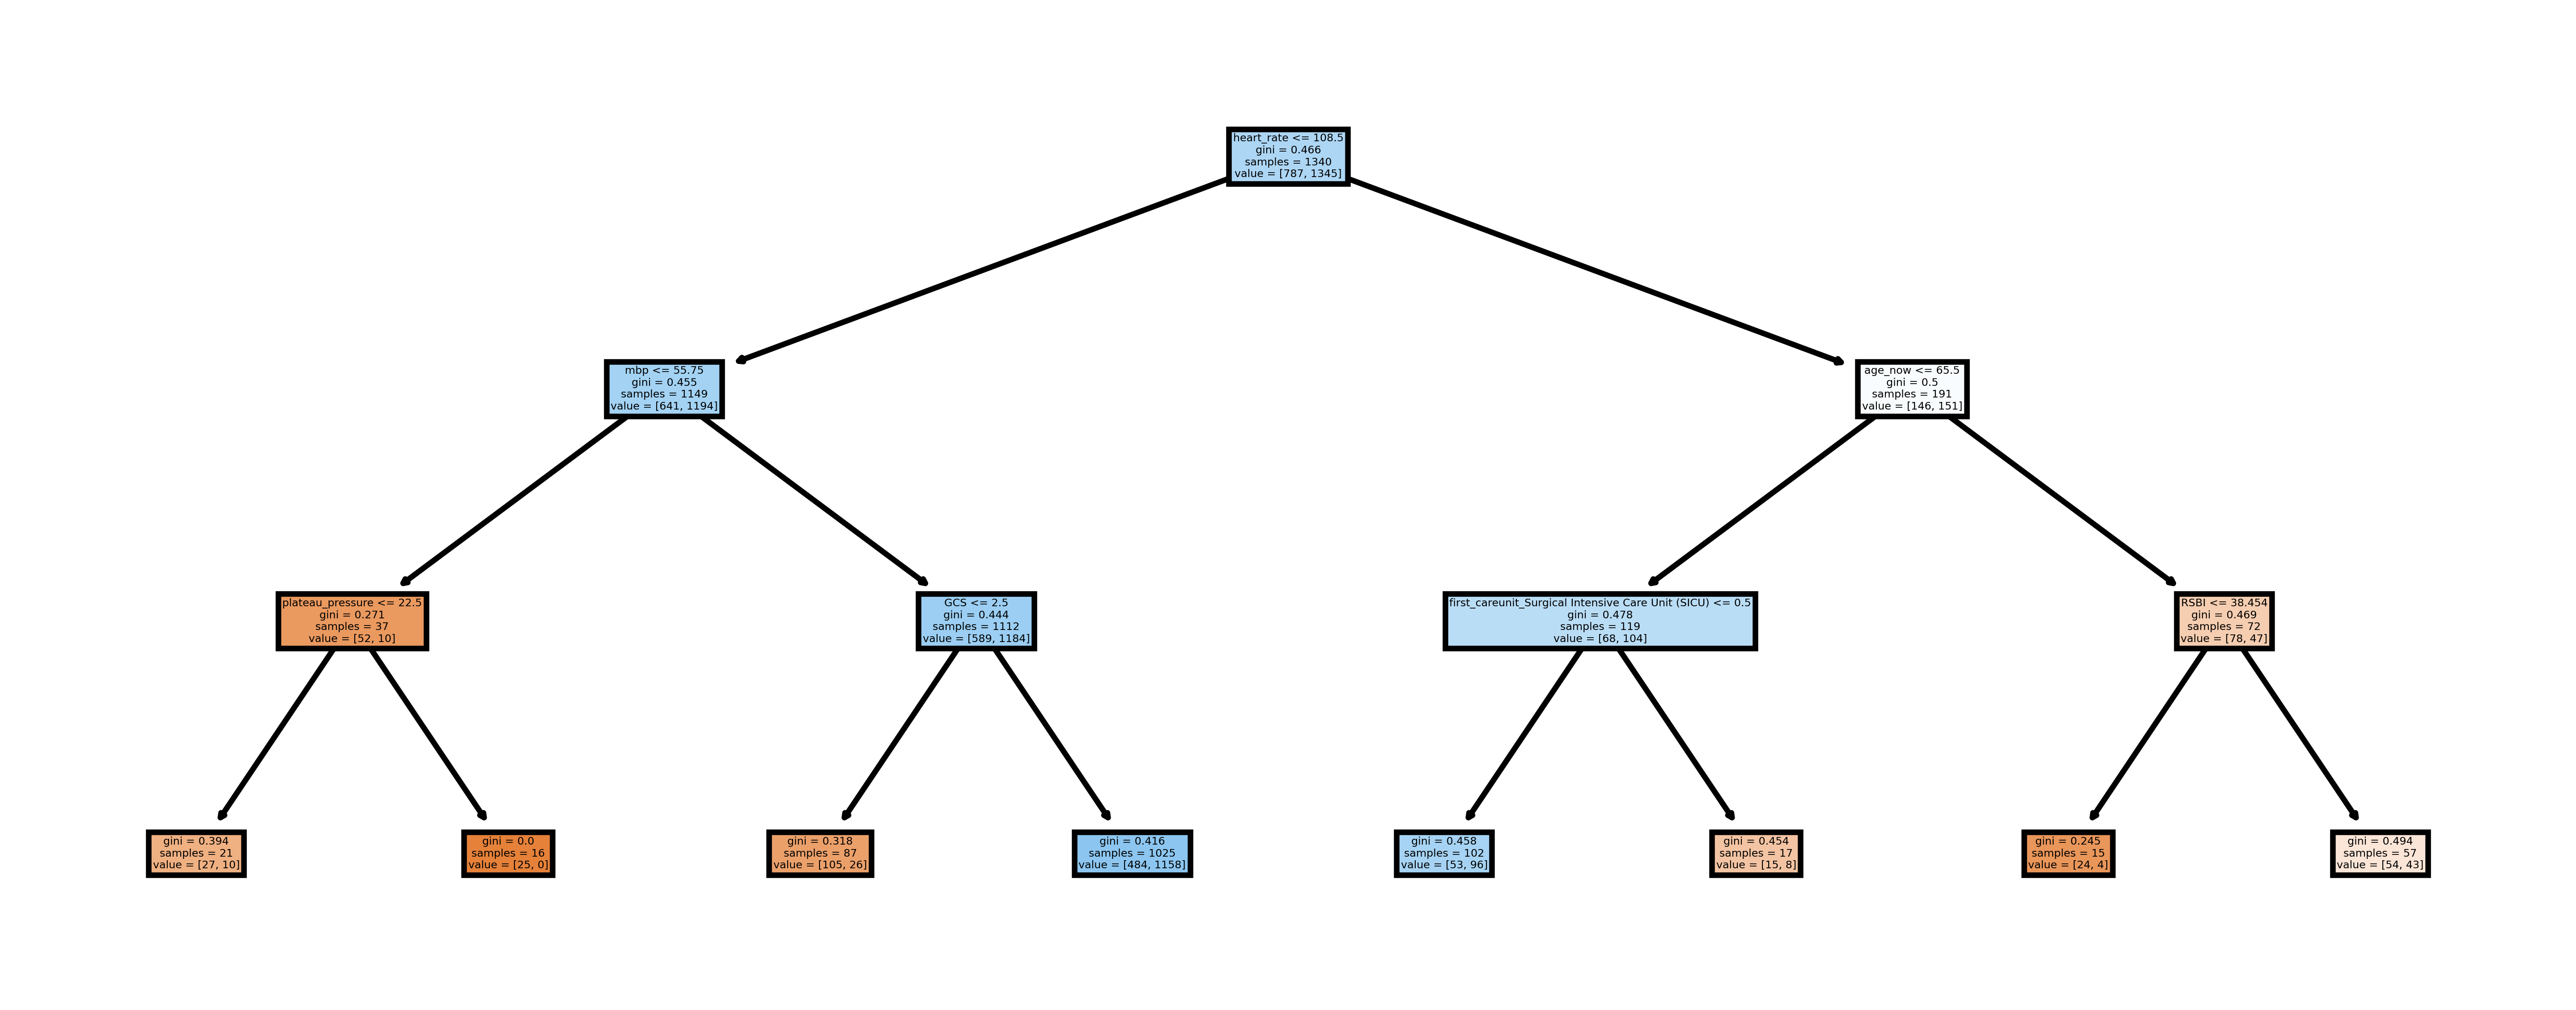

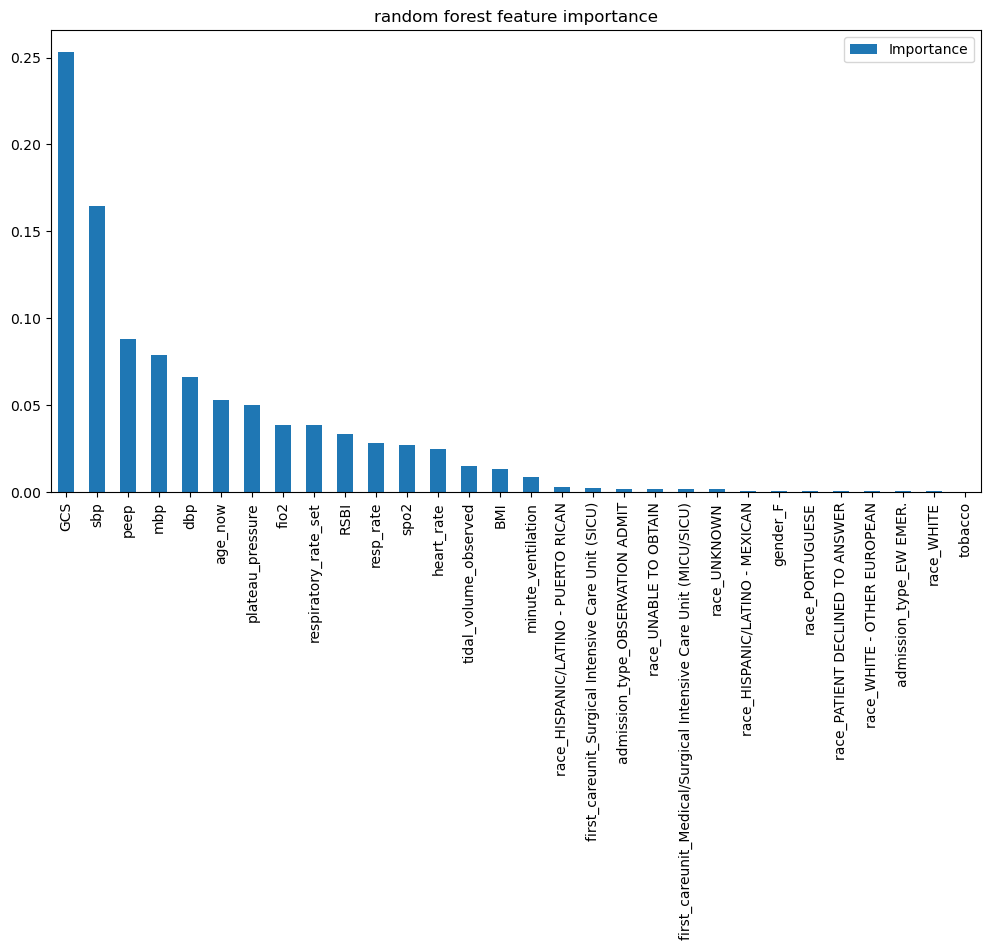

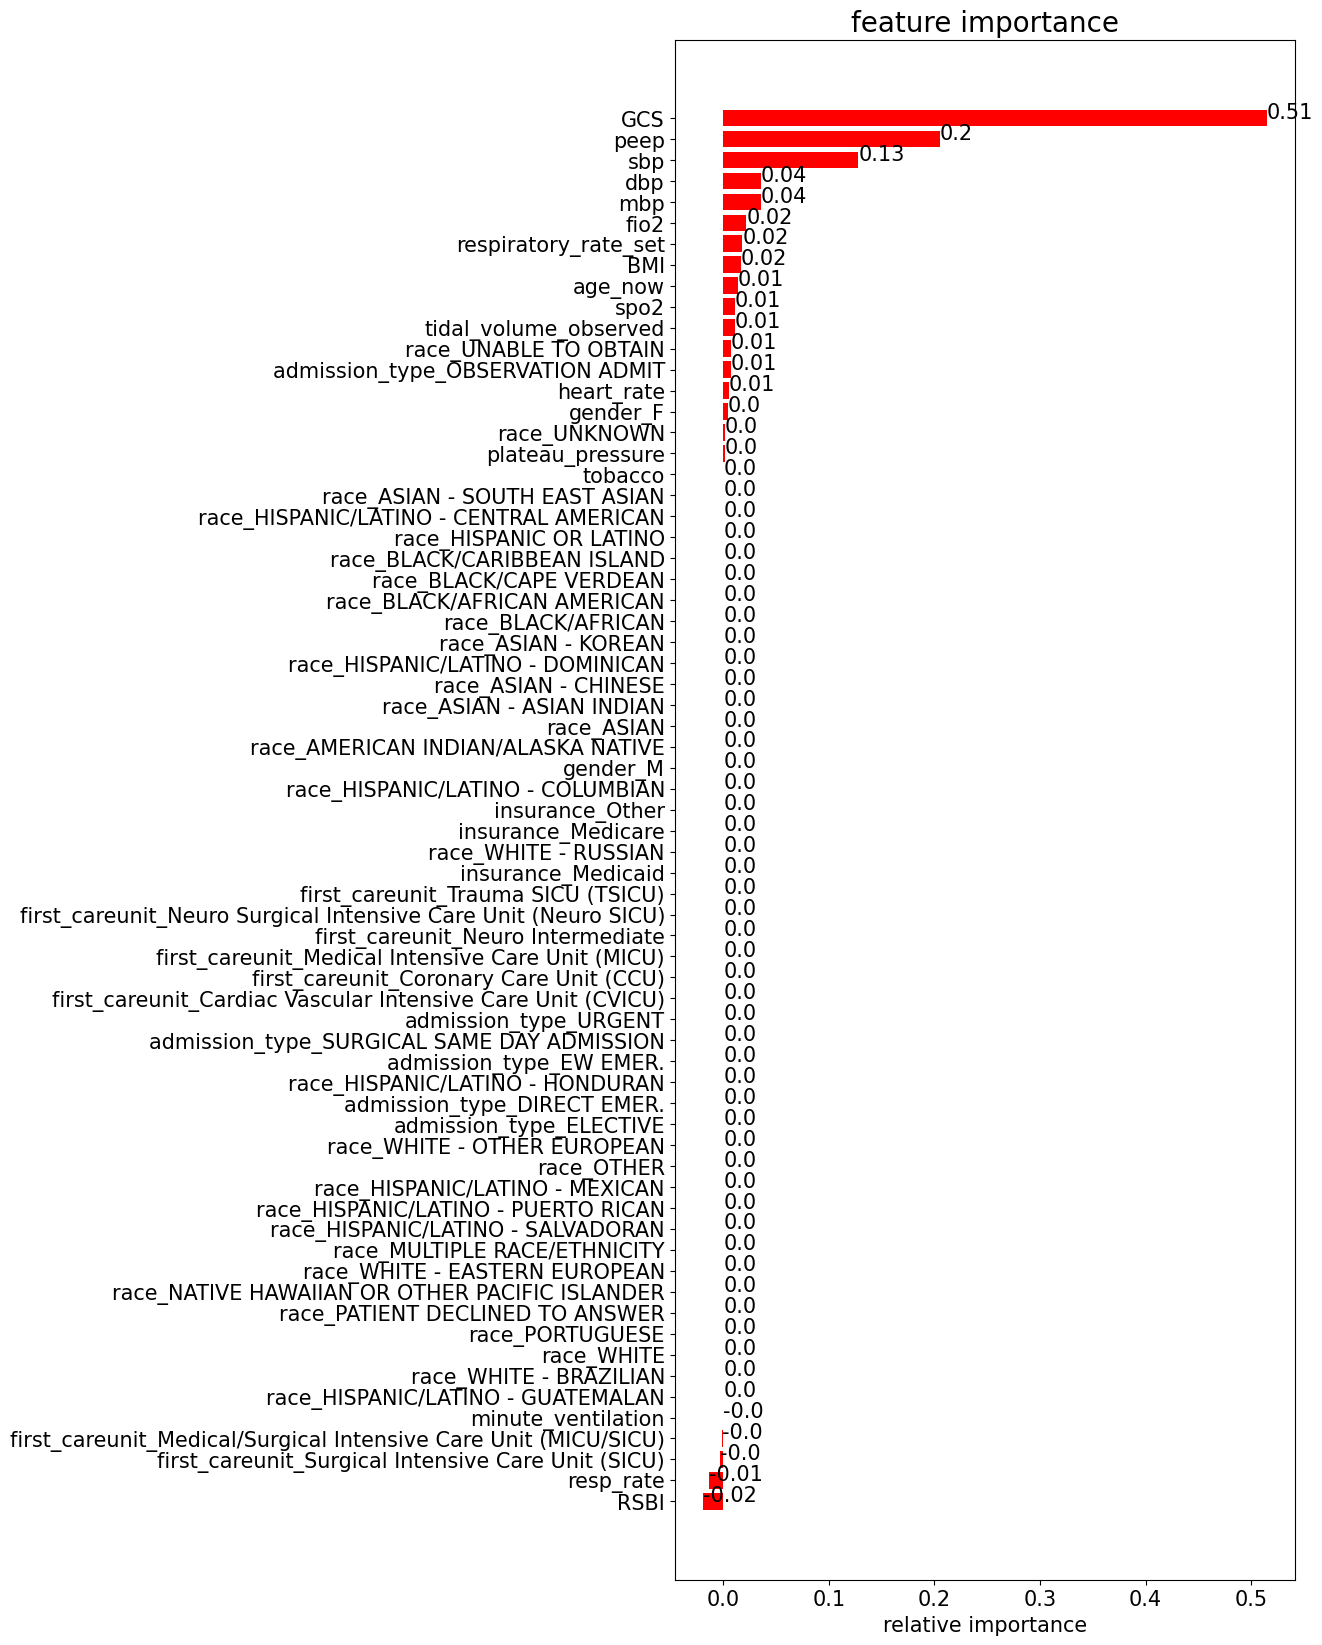

using test to compute feature_importance


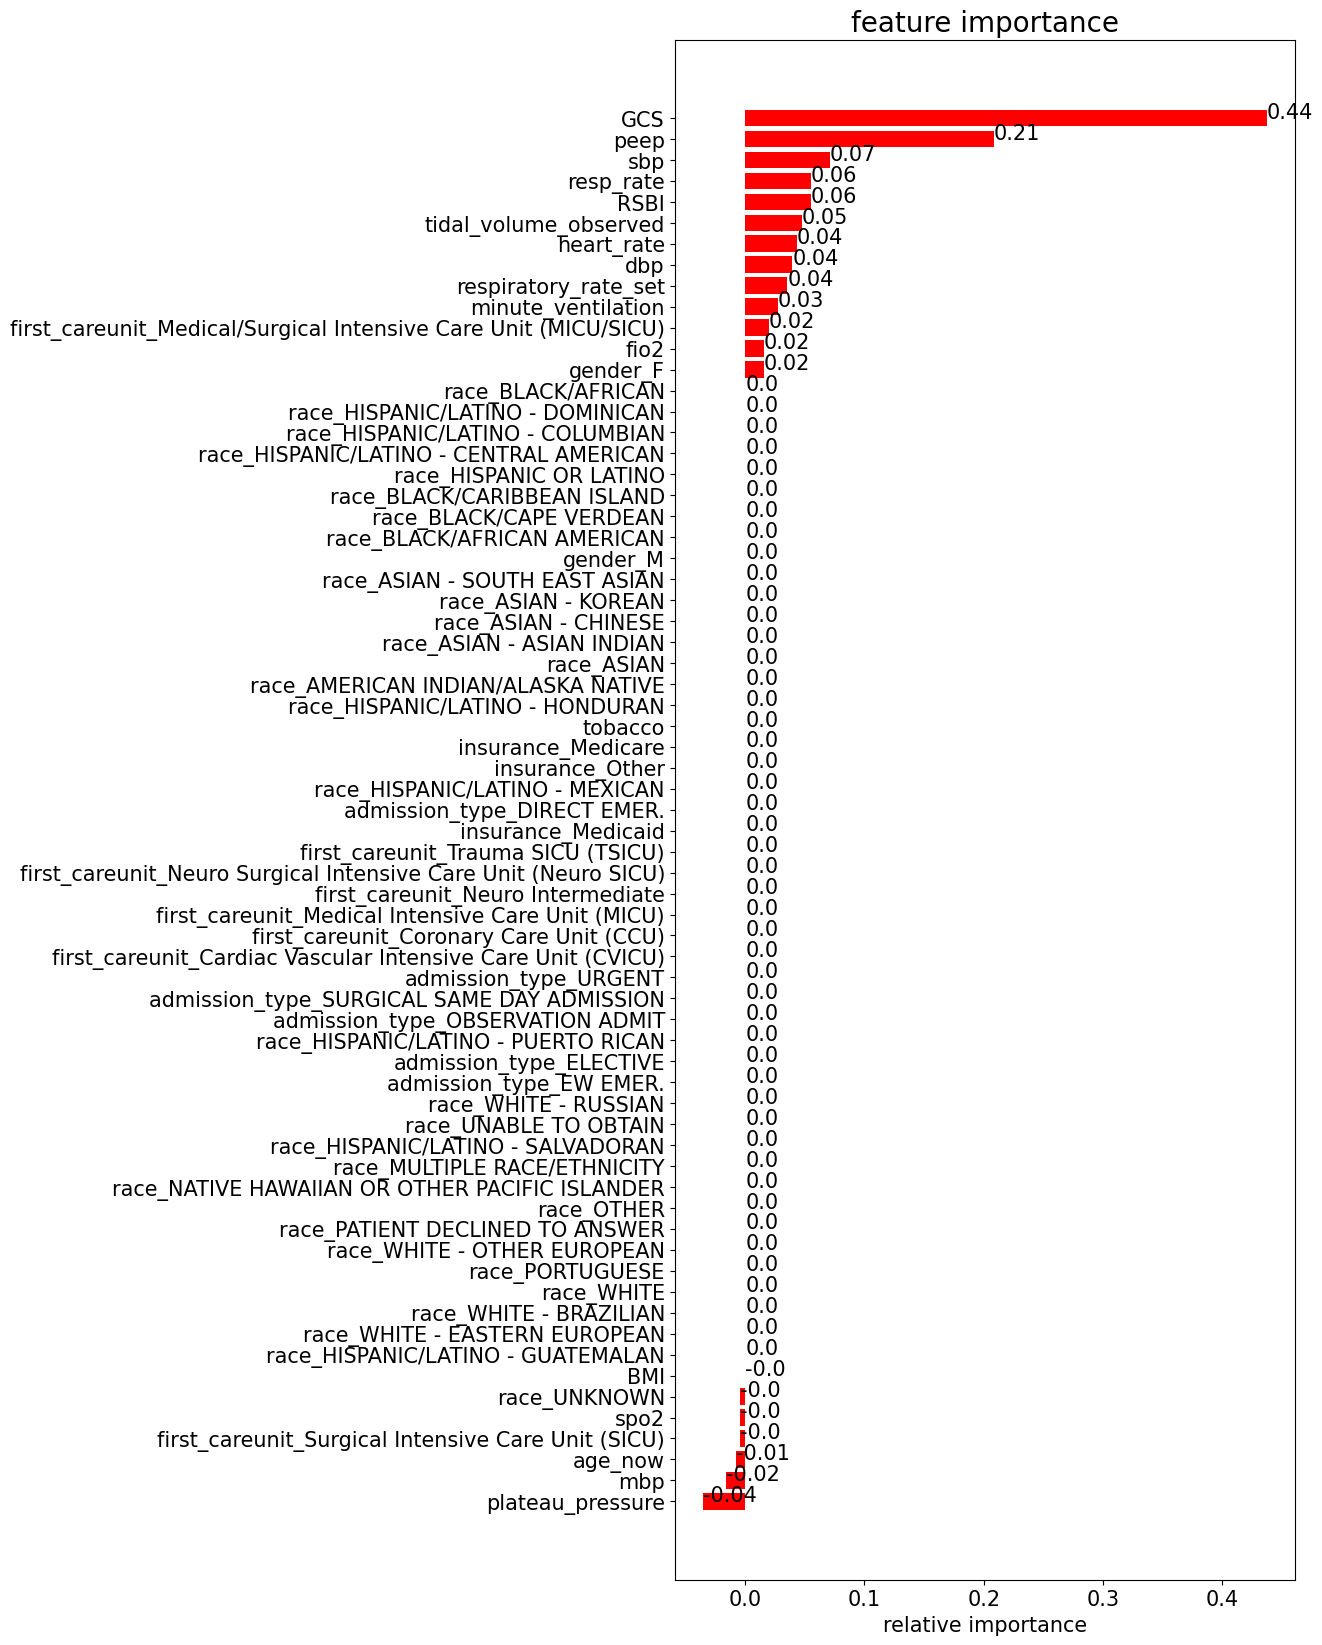

In [13]:
# step4 random forest
from sklearn.ensemble import RandomForestClassifier
tree_num = 5
from sklearn.model_selection import GridSearchCV

"""
Model = RandomForestClassifier()
param_grid = {'n_estimators':np.arange(1, 25), 'criterion':('gini', 'entropy', 'log_loss'), 'max_depth':np.arange(1, 29), 'random_state':[42]}
grid_search = GridSearchCV(estimator=Model, param_grid=param_grid, scoring='roc_auc', error_score='raise')
#grid_search.fit(train_X, train_y)
grid_search.fit(tr_v_X, tr_v_y)
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
randomforestModel = grid_search.best_estimator_
"""

# 使用訓練資料訓練模型
randomforestModel = RandomForestClassifier(criterion='gini', max_depth=3, n_estimators=23, random_state=42)
randomforestModel.fit(tr_v_X, tr_v_y)

# 使用訓練資料預測

print("before weaning hour =", print_before_weaning_hr)


# 使用訓練資料預測
"""
# accuracy for tr&v
print("train & v")
acc_function(randomforestModel, tr_v_X, tr_v_y)
"""
# accuracy for test
print("test")
acc_function(randomforestModel, test_X, test_y)


# draw tree in forest
#io = StringIO()
#fig, axes = plt.subplots(nrows=tree_num, ncols=3, figsize=(10, 2), dpi=900)
for i in range(tree_num):
    tree_of_rf = randomforestModel.estimators_[i]
    data = export_graphviz(tree_of_rf, feature_names=train_X.columns, max_depth=3, filled=True)
    graph = graphviz.Source(data)
    display(graph)
    figtmp, axestmp = plt.subplots(nrows=1, ncols=1, figsize=(8, 3), dpi=900)
    tree.plot_tree(tree_of_rf, feature_names=train_X.columns, max_depth=3, filled=True)
    #figtmp.set_title('Estimator: '+str(i))#, fontsize=8)
    figtmp.savefig('rf_tmp'+str(i)+'.jpg')


# feature importance
rf_importance = randomforestModel.feature_importances_
# plot importance
df_rf_importance = pd.DataFrame(rf_importance, index=tr_v_X.columns, columns=['Importance'])
df_rf_importance.sort_values(by='Importance', ascending=False, inplace=True)
df_rf_importance = df_rf_importance[:30]
df_rf_importance.plot(kind='bar', figsize=(12, 6))
plt.title('random forest feature importance')

print('using (train and validation) to compute feature_importance')
feature_importance(randomforestModel, tr_v_X, tr_v_y)
print('using test to compute feature_importance')
feature_importance(randomforestModel, test_X, test_y)

# csv
import csv
csvfile_rf = open('rf_for_roc.csv', 'w', newline='')
writer = csv.writer(csvfile_rf)
writer.writerow(randomforestModel.predict_proba(test_X)[:, 1])
csvfile_rf.close()

before weaning hour = 0
train & v
sensitivity=recall= 0.9460856720827179
specificity 0.37017994858611825
confusion_matrix
 [[ 288  490]
 [  73 1281]]
accuracy_score 0.7359287054409006
c_r
              precision    recall  f1-score   support

     class 0       0.80      0.37      0.51       778
     class 1       0.72      0.95      0.82      1354

    accuracy                           0.74      2132
   macro avg       0.76      0.66      0.66      2132
weighted avg       0.75      0.74      0.71      2132

test
sensitivity=recall= 0.9611940298507463
specificity 0.32124352331606215
confusion_matrix
 [[ 62 131]
 [ 13 322]]
accuracy_score 0.7272727272727273
c_r
              precision    recall  f1-score   support

     class 0       0.83      0.32      0.46       193
     class 1       0.71      0.96      0.82       335

    accuracy                           0.73       528
   macro avg       0.77      0.64      0.64       528
weighted avg       0.75      0.73      0.69       528

usi

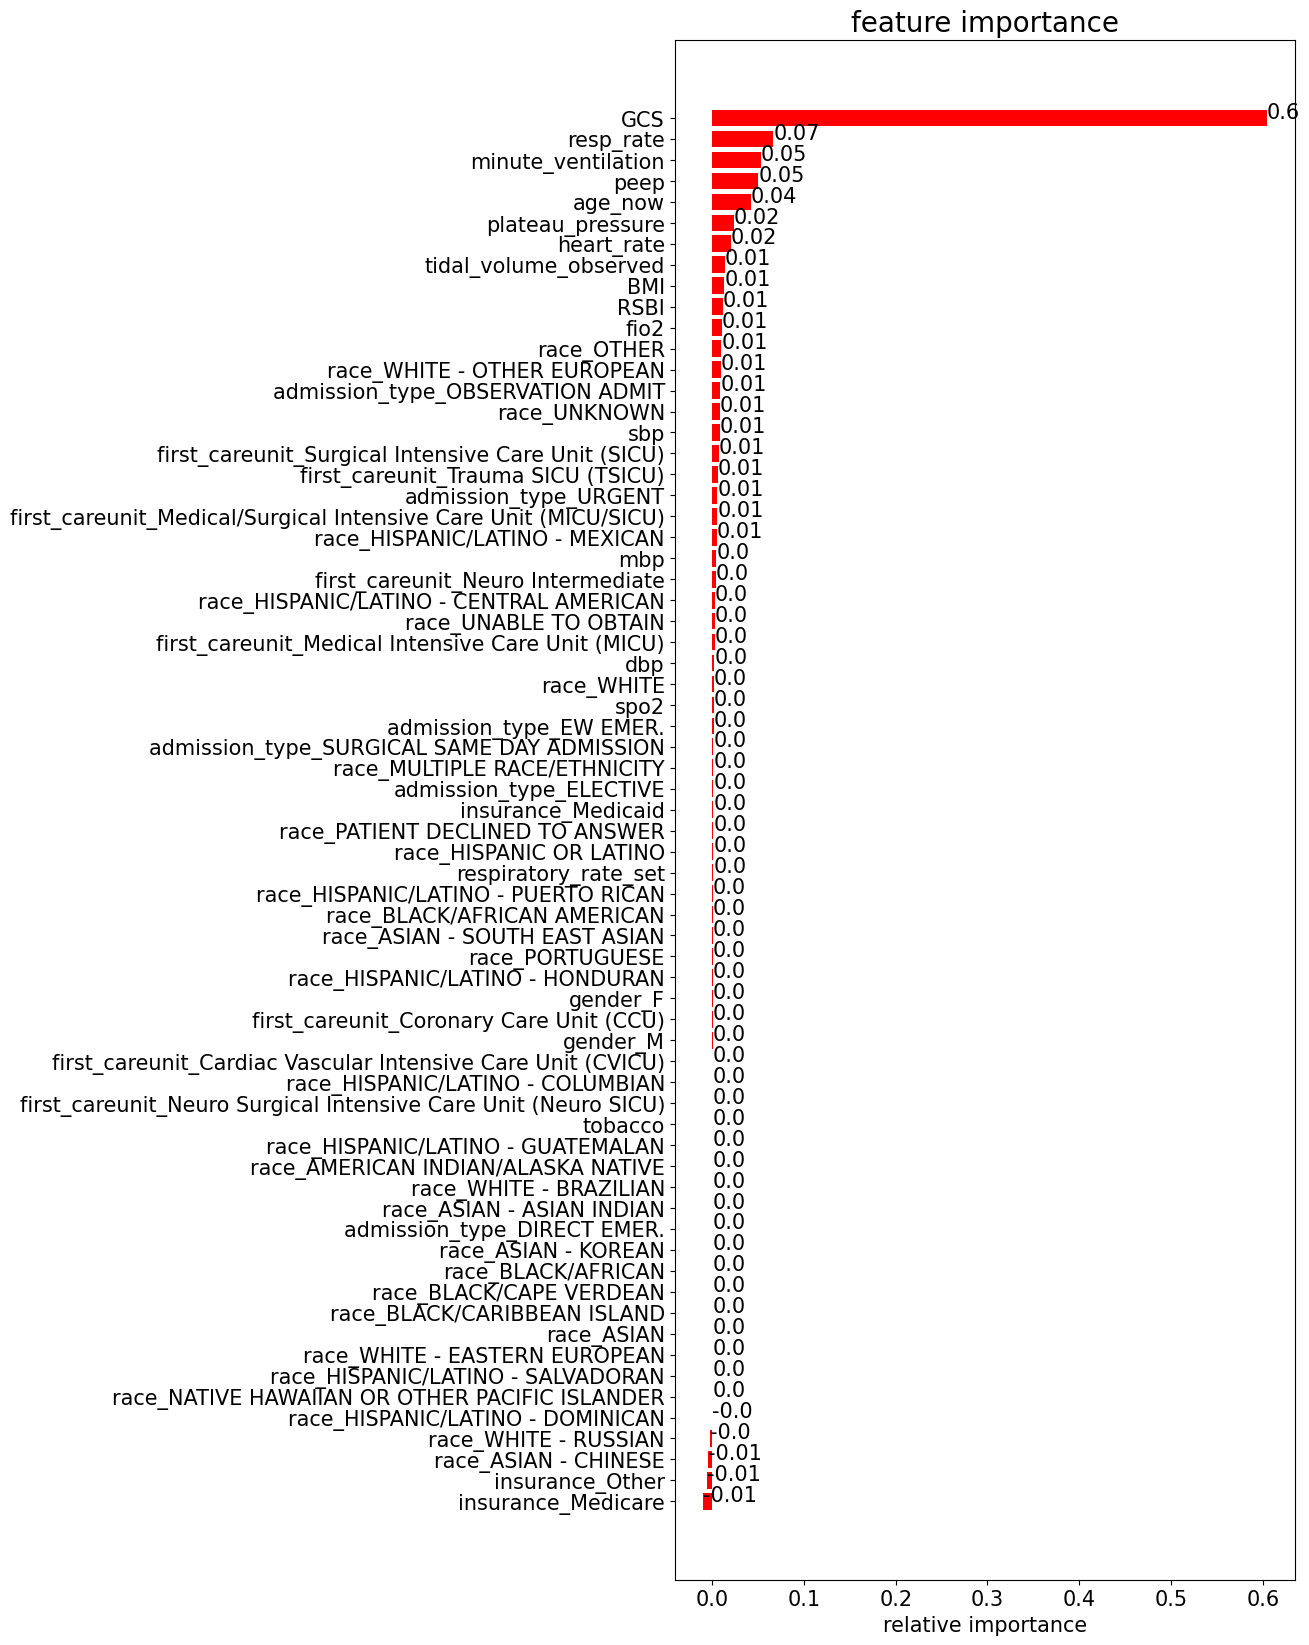

using test to compute feature_importance


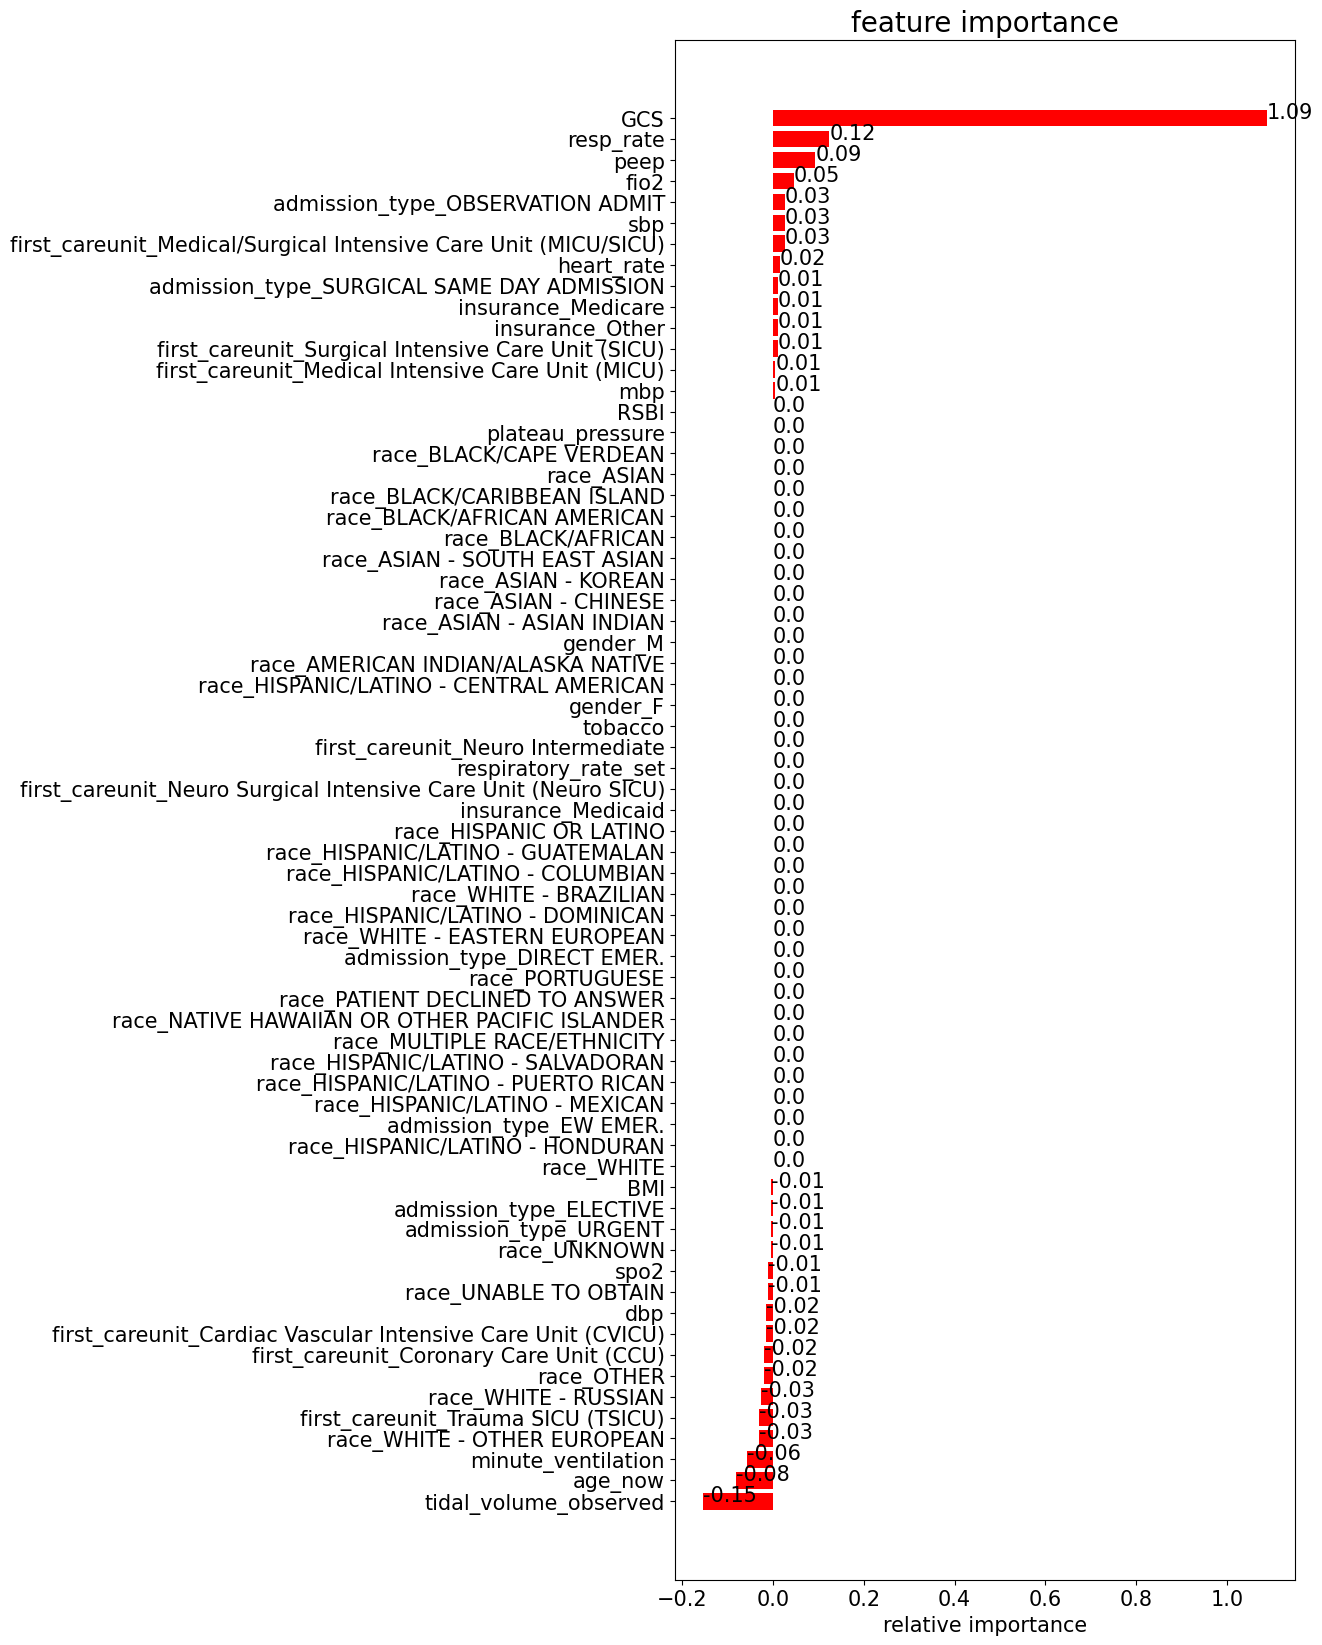

In [15]:
# step4 SVM

# param_grid = {'C':np.linspace(1, 3, 3, endpoint=True), 'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'random_state':[42]} ->get {C=2, 'kernel'='linear'}
print("before weaning hour =",print_before_weaning_hr)

from sklearn.svm import SVC

# SVM with all features
from sklearn.model_selection import GridSearchCV
"""
Model = SVC() #(C=1, kernel=linear, probability=True, random_state=42)
param_grid = {'C':np.linspace(1, 3, 3, endpoint=True), 'kernel':('linear', 'poly'),'probability':[True], 'random_state':[42]} #, 'rbf', 'sigmoid'
#param_grid = {'C':[1], 'kernel':['linear'],'probability':[True], 'random_state':[42]}
grid_search = GridSearchCV(estimator=Model, param_grid=param_grid, scoring='roc_auc', error_score='raise')
grid_search.fit(tr_v_X, tr_v_y)
print("Best parameter: ", grid_search.best_params_)
svmModel = grid_search.best_estimator_
"""

#"""
svmModel = SVC(C=1, kernel='linear', probability=True, random_state=42)
svmModel.fit(tr_v_X, tr_v_y)
#"""

# accuracy for tr&v
print("train & v")
acc_function(svmModel, tr_v_X, tr_v_y)

# accuracy for test
print("test")
acc_function(svmModel, test_X, test_y)

print('using (train and validation) to compute feature_importance')
feature_importance(svmModel, tr_v_X, tr_v_y)
print('using test to compute feature_importance')
feature_importance(svmModel, test_X, test_y)

# csv
import csv
csvfile_svm = open('svm_for_roc.csv', 'w', newline='')
writer = csv.writer(csvfile_svm)
writer.writerow(svmModel.predict_proba(test_X)[:, 1])
csvfile_svm.close()

before weaning hour = 0
train & v
sensitivity=recall= 0.9542097488921714
specificity 0.40359897172236503
confusion_matrix
 [[ 314  464]
 [  62 1292]]
accuracy_score 0.7532833020637899
c_r
              precision    recall  f1-score   support

     class 0       0.84      0.40      0.54       778
     class 1       0.74      0.95      0.83      1354

    accuracy                           0.75      2132
   macro avg       0.79      0.68      0.69      2132
weighted avg       0.77      0.75      0.73      2132

test
sensitivity=recall= 0.9343283582089552
specificity 0.37823834196891193
confusion_matrix
 [[ 73 120]
 [ 22 313]]
accuracy_score 0.7310606060606061
c_r
              precision    recall  f1-score   support

     class 0       0.77      0.38      0.51       193
     class 1       0.72      0.93      0.82       335

    accuracy                           0.73       528
   macro avg       0.75      0.66      0.66       528
weighted avg       0.74      0.73      0.70       528

usi

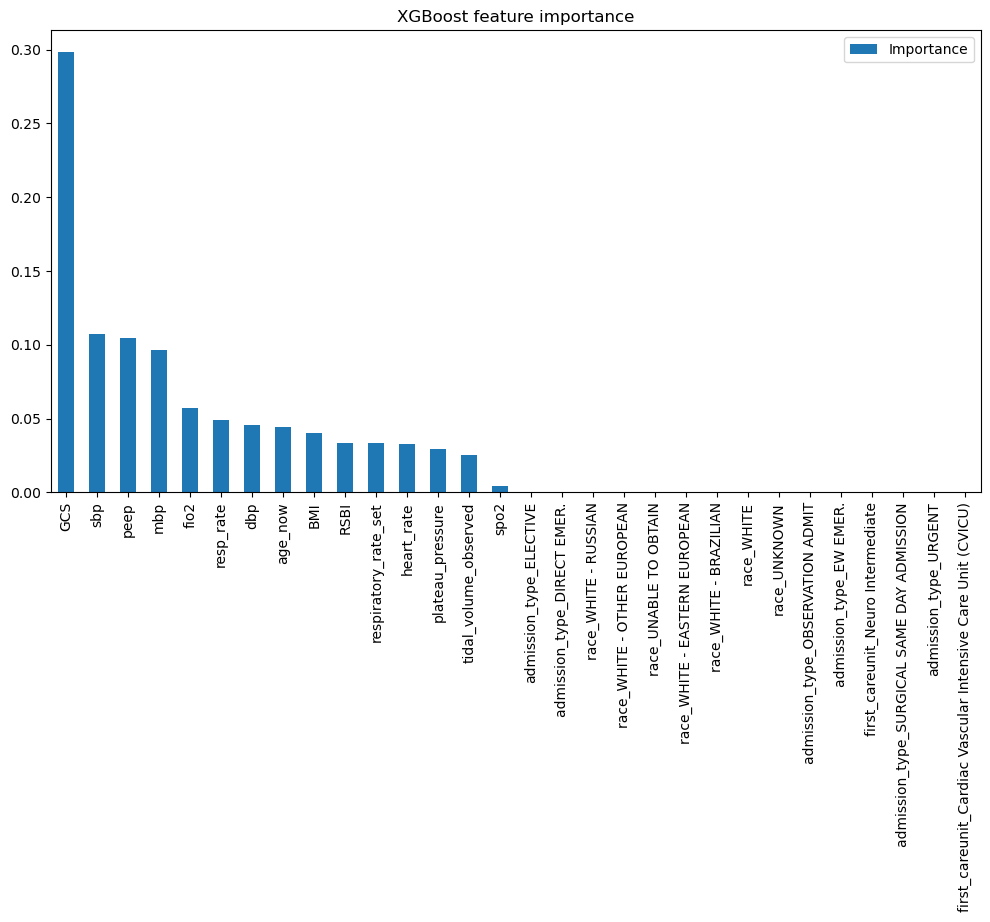

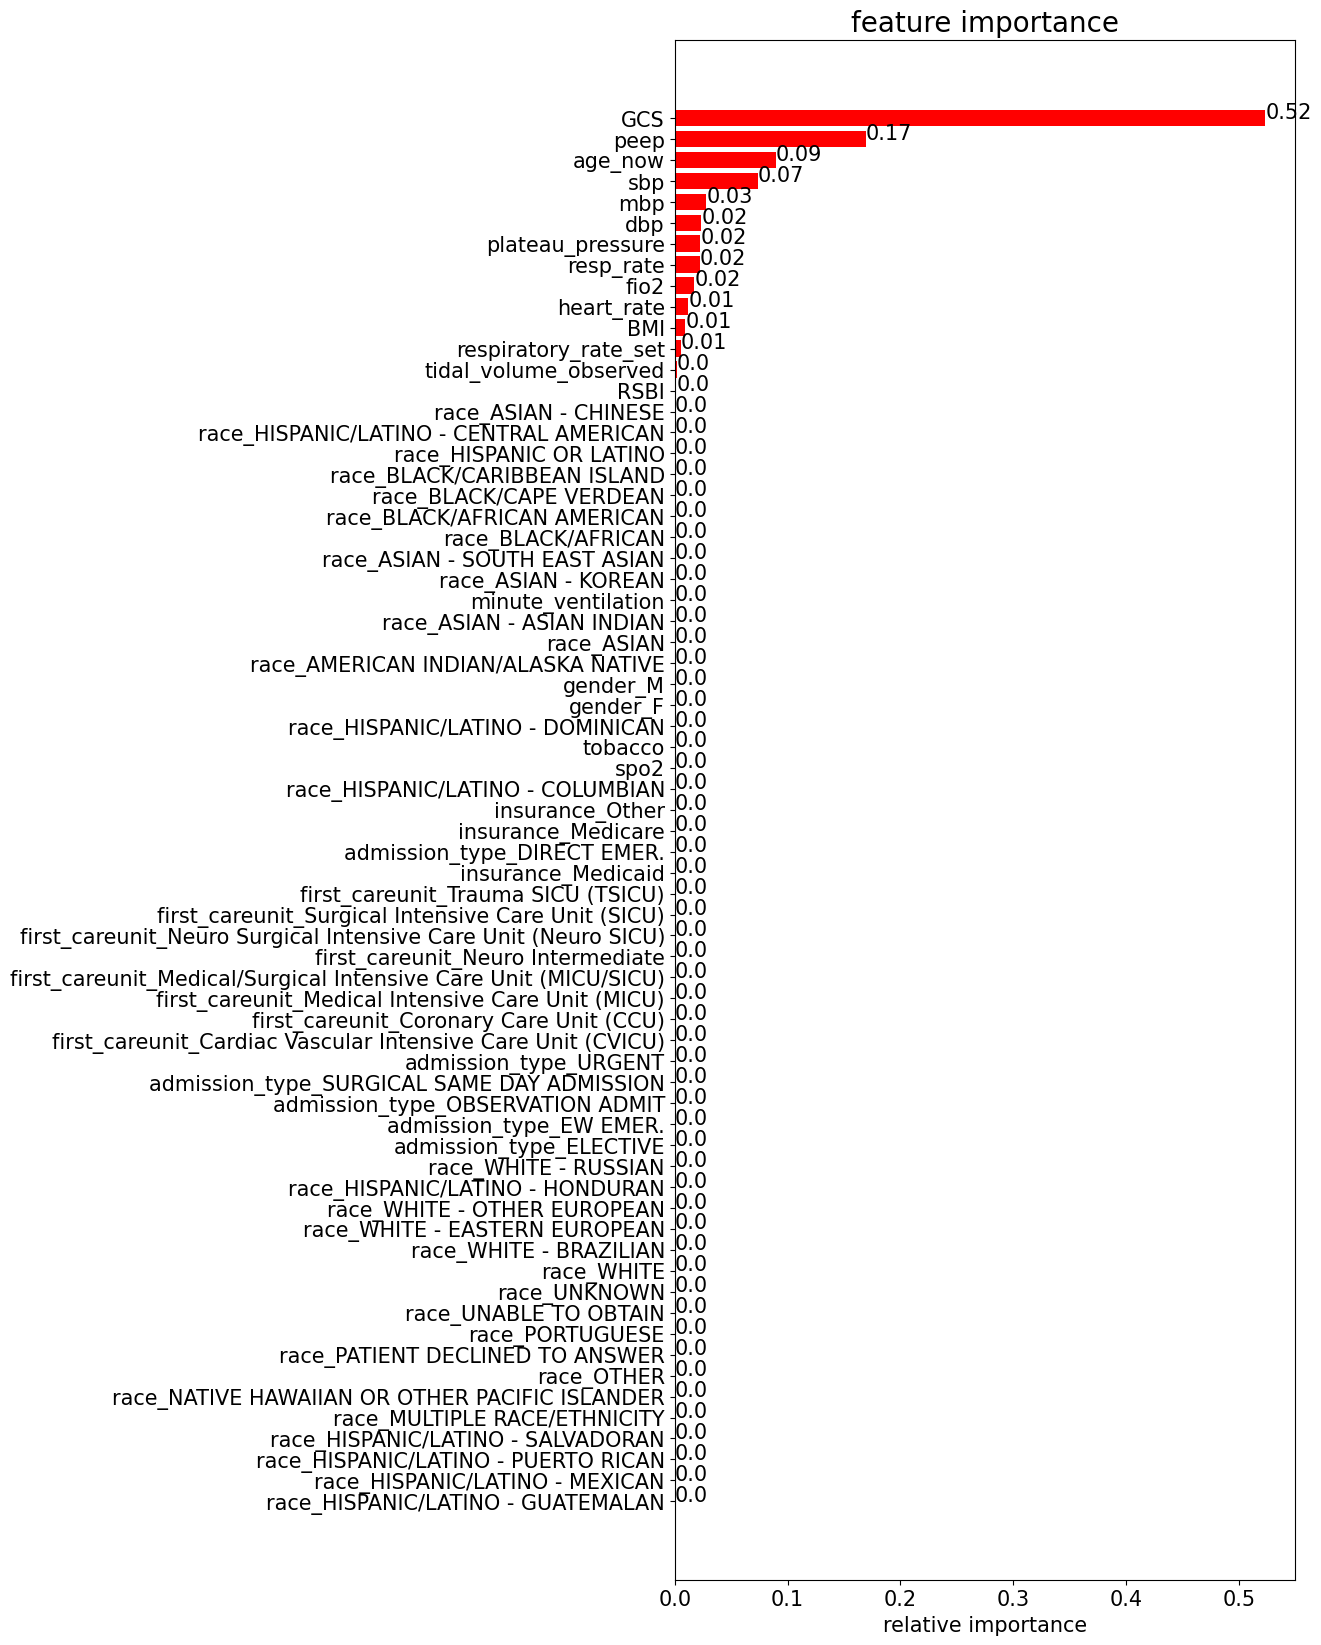

using test to compute feature_importance


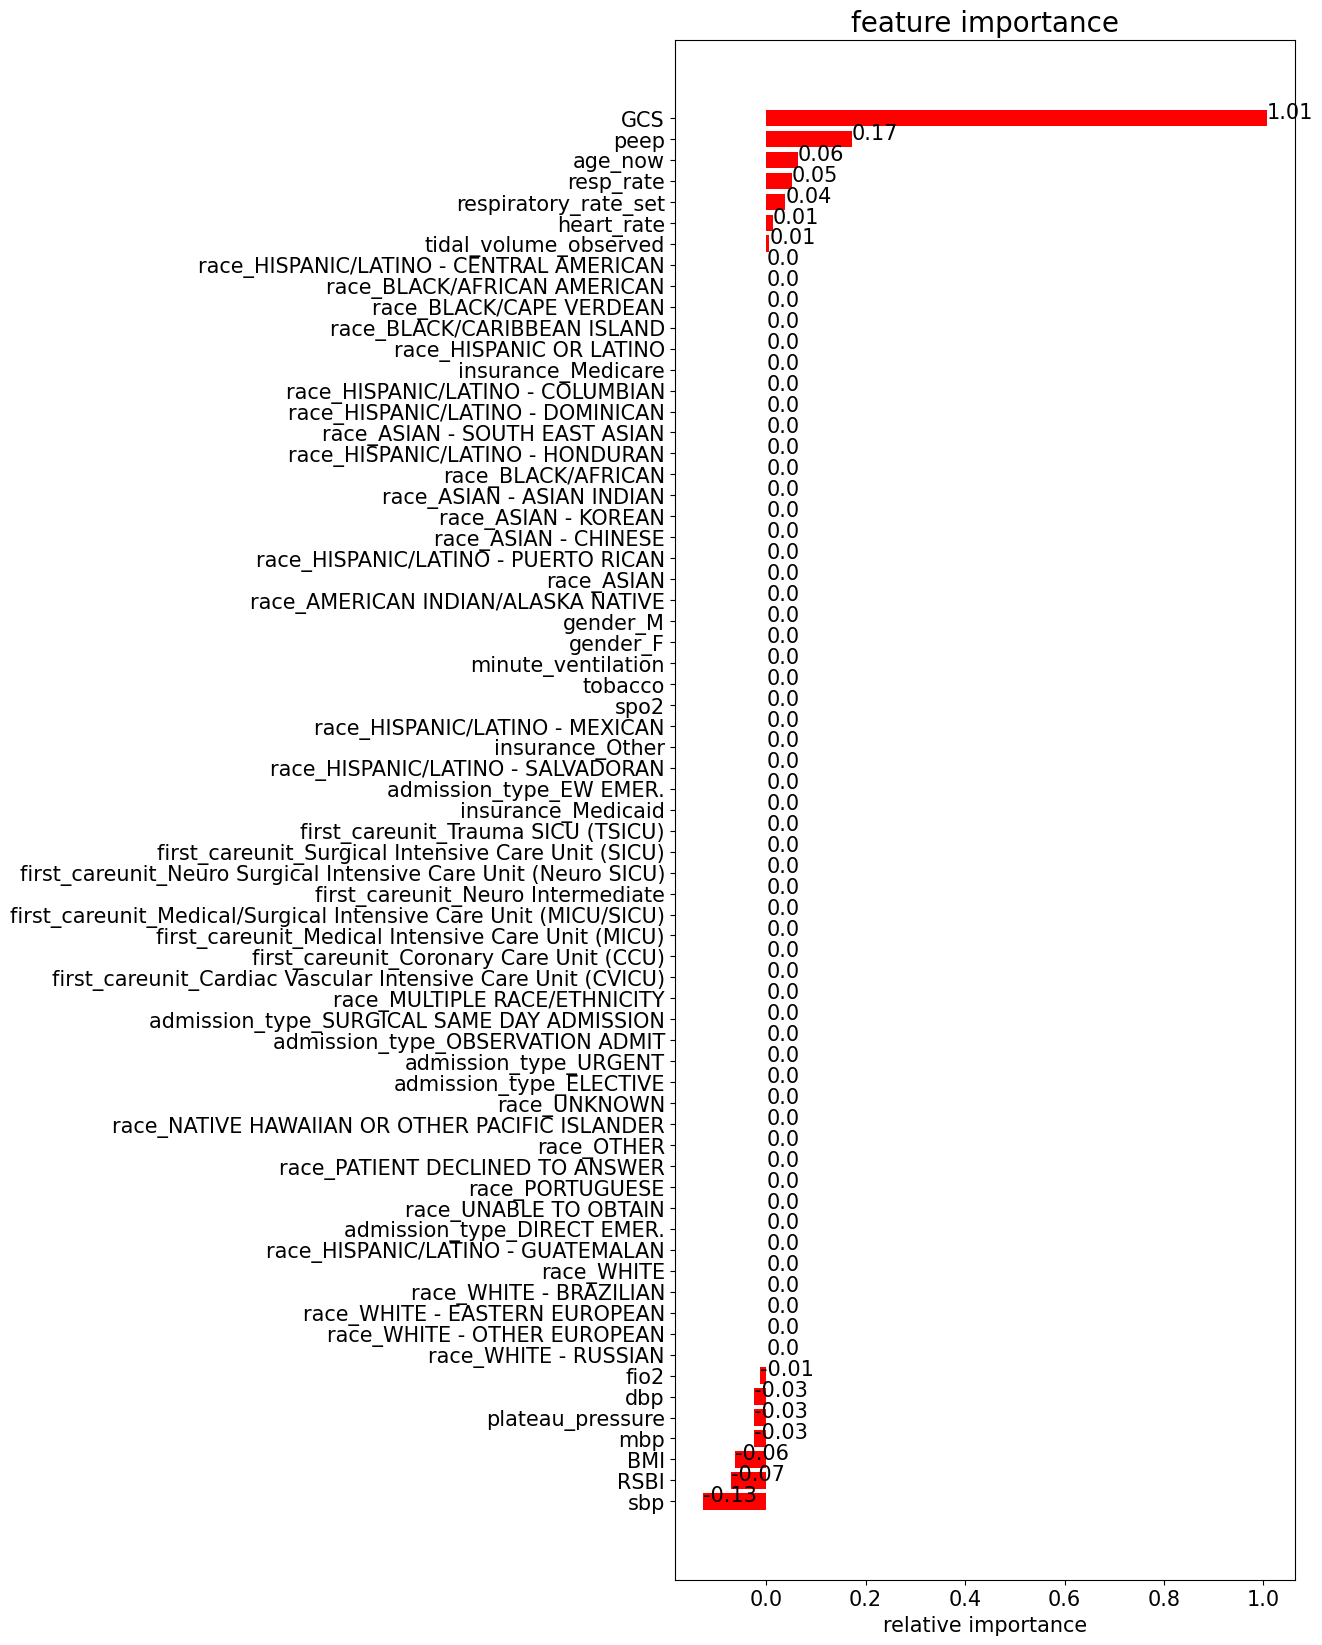

In [16]:
#step4 XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

print("before weaning hour =", print_before_weaning_hr)

"""
Model = xgb.XGBClassifier()
param_grid =  {'n_estimators':np.arange(7, 20), 'max_depth':np.arange(1, 15), 'min_child_weight':np.arange(1, 16),  'random_state':[42]} #,'subsample':[0.6, 0.7, 0.8],'subsample':[0.5, 0.7, 0.8, 1], 'colsample_bytree':[0.5, 0.7, 0.8, 1]}#,'subsample':[0.5, 0.7, 0.8, 1], 'colsample_bytree':[0.5, 0.7, 0.8, 1]}
#param_grid = {'C':[2], 'kernel':['linear'], 'random_state':[42]}
grid_search = GridSearchCV(estimator=Model, param_grid=param_grid, scoring='roc_auc', error_score='raise')
grid_search.fit(tr_v_X, tr_v_y)
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
xgbModel = grid_search.best_estimator_
"""

xgbModel = xgb.XGBClassifier(max_depth=3, min_child_weight=12, n_estimators=12, random_state=42)
xgbModel.fit(tr_v_X, tr_v_y)

# accuracy for tr&v
print("train & v")
acc_function(xgbModel, tr_v_X, tr_v_y)

# accuracy for test
print("test")
acc_function(xgbModel, test_X, test_y)

# feature importance
xgb_importance = xgbModel.feature_importances_
# plot importance
df_xgb_importance = pd.DataFrame(xgb_importance, index=tr_v_X.columns, columns=['Importance'])
df_xgb_importance.sort_values(by='Importance', ascending=False, inplace=True)
df_xgb_importance = df_xgb_importance[:30]
df_xgb_importance.plot(kind='bar', figsize=(12, 6))
plt.title('XGBoost feature importance')

print('using (train and validation) to compute feature_importance')
feature_importance(xgbModel, tr_v_X, tr_v_y)
print('using test to compute feature_importance')
feature_importance(xgbModel, test_X, test_y)

# csv
import csv
csvfile_xgb = open('xgb_for_roc.csv', 'w', newline='')
writer = csv.writer(csvfile_xgb)
writer.writerow(xgbModel.predict_proba(test_X)[:, 1])
csvfile_xgb.close()

In [19]:
print((df_with_one_hot_encoding_drop_not_num.columns))
print((df.columns))

Index(['stay_id', 'age_now', 'weight_kg', 'height_cm', 'tobacco', 'RSBI',
       'minute_ventilation', 'peep', 'fio2', 'tidal_volume_observed',
       'respiratory_rate_set', 'plateau_pressure', 'heart_rate', 'sbp', 'dbp',
       'mbp', 'resp_rate', 'spo2', 'label', 'gender_F', 'gender_M',
       'race_AMERICAN INDIAN/ALASKA NATIVE', 'race_ASIAN',
       'race_ASIAN - ASIAN INDIAN', 'race_ASIAN - CHINESE',
       'race_ASIAN - KOREAN', 'race_ASIAN - SOUTH EAST ASIAN',
       'race_BLACK/AFRICAN', 'race_BLACK/AFRICAN AMERICAN',
       'race_BLACK/CAPE VERDEAN', 'race_BLACK/CARIBBEAN ISLAND',
       'race_HISPANIC OR LATINO', 'race_HISPANIC/LATINO - CENTRAL AMERICAN',
       'race_HISPANIC/LATINO - COLUMBIAN', 'race_HISPANIC/LATINO - DOMINICAN',
       'race_HISPANIC/LATINO - GUATEMALAN', 'race_HISPANIC/LATINO - HONDURAN',
       'race_HISPANIC/LATINO - MEXICAN', 'race_HISPANIC/LATINO - PUERTO RICAN',
       'race_HISPANIC/LATINO - SALVADORAN', 'race_MULTIPLE RACE/ETHNICITY',
       'rac

listincsv [['22.192474'], ['30.35641'], ['19.301945'], ['24.780201'], ['35.254726'], ['27.818314'], ['29.356834'], ['32.080303'], ['32.617027'], ['6.77363'], ['23.203985'], ['-47.26187'], ['28.109211'], ['31.847845'], ['13.761732'], ['32.65591'], ['21.12536'], ['-37.70058'], ['8.2076645'], ['25.089256'], ['18.331358'], ['29.794224'], ['11.396943'], ['22.169752'], ['18.225477'], ['14.447671'], ['13.426235'], ['29.21275'], ['-31.60046'], ['34.940617'], ['31.356815'], ['35.88836'], ['31.605646'], ['-63.532642'], ['20.313694'], ['12.03508'], ['-45.32057'], ['15.795241'], ['32.58524'], ['38.700092'], ['26.280016'], ['37.49445'], ['26.896278'], ['6.2488666'], ['23.935913'], ['-37.30003'], ['-67.91827'], ['26.374763'], ['29.961031'], ['21.03037'], ['37.48213'], ['35.28687'], ['17.157227'], ['30.553825'], ['26.118626'], ['40.717815'], ['1.7318045'], ['26.047094'], ['38.41122'], ['18.919424'], ['40.378445'], ['37.357506'], ['19.930456'], ['-55.043835'], ['20.238571'], ['18.12464'], ['12.213954'

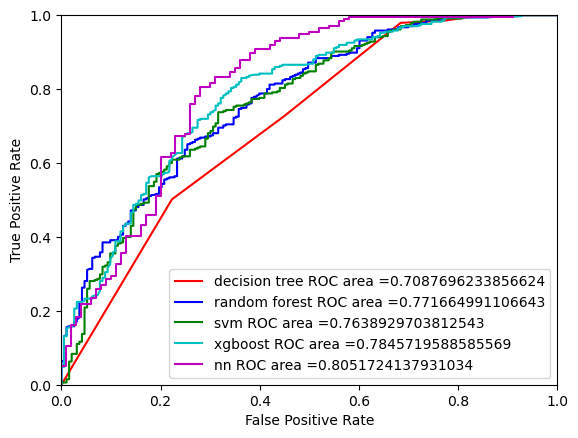

In [23]:
# multi ROC curve 
#def multiROC(pred_y_1, pred_y_2, pred_y_3, pred_y_4, test_y):
def multiROC(pred_y_1, pred_y_2, pred_y_3, pred_y_4, pred_y_5, test_y, nn_label): #
    plt.figure(0).clf()
    print("ROC curve")
    fpr_1, tpr_1, thershold_1 = metrics.roc_curve(test_y, pred_y_1)
    fpr_2, tpr_2, thershold_2 = metrics.roc_curve(test_y, pred_y_2)
    fpr_3, tpr_3, thershold_3 = metrics.roc_curve(test_y, pred_y_3)
    fpr_4, tpr_4, thershold_4 = metrics.roc_curve(test_y, pred_y_4)
    fpr_5, tpr_5, thershold_5 = metrics.roc_curve(nn_label, pred_y_5)
    roc_auc_1 = metrics.auc(fpr_1, tpr_1) # auroc
    roc_auc_2 = metrics.auc(fpr_2, tpr_2) # auroc
    roc_auc_3 = metrics.auc(fpr_3, tpr_3) # auroc
    roc_auc_4 = metrics.auc(fpr_4, tpr_4) # auroc
    roc_auc_5 = metrics.auc(fpr_5, tpr_5) # auroc
    #print("roc_auc", roc_auc_1)
    plt.plot(fpr_1, tpr_1, label='decision tree ROC area ='+str(roc_auc_1), color='Red')
    plt.plot(fpr_2, tpr_2, label='random forest ROC area ='+str(roc_auc_2), color='Blue')
    plt.plot(fpr_3, tpr_3, label='svm ROC area ='+str(roc_auc_3), color='g')
    plt.plot(fpr_4, tpr_4, label='xgboost ROC area ='+str(roc_auc_4), color='c')
    plt.plot(fpr_5, tpr_5, label='nn ROC area ='+str(roc_auc_5), color='m')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.legend()
    #plt.show()


# read file
csvfile_list = ['dt_for_roc.csv', 'rf_for_roc.csv', 'svm_for_roc.csv', 'xgb_for_roc.csv', 'nn_for_roc.csv' ]
pred_y_model = []
for i in np.arange(len(csvfile_list)):
    csvfile = csvfile_list[i]
    with open(csvfile) as csv_f :
        csvReader = csv.reader(csv_f)
        listincsv = list(csvReader)
    if i != 4:
        listincsv[0] = np.array(listincsv[0], dtype=float)
        listincsv[0] = listincsv[0].tolist()
    else: # i==4
        #print("listincsv", listincsv)
        listincsv = pd.DataFrame(listincsv)
        listincsv[0] = listincsv.iloc[:, [0]]
        #print("listincsv[0]", listincsv[0])
        listincsv[0] = np.array(listincsv[0], dtype=float)
        listincsv[0] = listincsv[0].tolist()
    pred_y_model.append(listincsv[0]) #decisionTreeModel.predict_proba(test_X)[:, 1]
#"""
csvfile = 'nn_for_roc_label.csv'
with open(csvfile) as csv_f :
    csvReader = csv.reader(csv_f)
    listincsv = list(csvReader)
nn_label = listincsv
#if i != 4:
nn_label = np.array(listincsv, dtype=float)
nn_label = nn_label.flatten()
nn_label = pd.Series(nn_label.flatten())
#listincsv[0] = listincsv[0].tolist()
#"""
# pred_y_model[0]=pred_y_dt, pred_y_model[1]=pred_y_rf, pred_y_model[2]=pred_y_svm, pred_y_model[3]=pred_y_xgb
#pred_y_dt = listincsv[0] #decisionTreeModel.predict_proba(test_X)[:, 1]
#pred_y_rf = randomforestModel.predict_proba(test_X)[:, 1]
# call function
print(type(test_y))
print(test_y)
print(len(pred_y_model[2]))
#print(pred_y_model[4].shape)
print(type(nn_label))
print(nn_label)
print(len(pred_y_model[4]))
multiROC(pred_y_model[0], pred_y_model[1], pred_y_model[2], pred_y_model[3], pred_y_model[4], test_y, nn_label) #pred_y_svm, pred_y_xgboost,


#print("int", listincsv[0])

#print(decisionTreeModel.predict_proba(test_X)[:, 1])
#print(randomforestModel.predict_proba(test_X)[:, 1])

67